In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# CHEKING DISK STORAGE

In [2]:
import shutil

# Get disk space details
total, used, free = shutil.disk_usage("/")

# Convert to human-readable format
def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print()
print(f"Total Space: {format_size(total)}")
print(f"Used Space: {format_size(used)}")
print(f"Free Space: {format_size(free)}")
print()


Total Space: 915.32 GB
Used Space: 733.78 GB
Free Space: 134.98 GB



In [3]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size, skipping broken symbolic links
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

def print_directory_size(directory):
    size_bytes = get_directory_size(directory)
    # Convert bytes to a human-readable format (KB, MB, GB)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024:
            print(f"Size of '{directory}': {size_bytes:.2f} {unit}")
            break
        size_bytes /= 1024

print()
# Example usage
preprocessed_files_path = "data/train_data/preprocessed_files"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

preprocessed_files_path = "executions"  # Change this to your target directory
print_directory_size(preprocessed_files_path)
print()


Size of 'data/train_data/preprocessed_files': 2.90 GB
Size of 'executions': 14.82 GB



# SPECIFY EXECUTION ID TO EVALUATE


In [4]:
import os

############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr_v2/tuning-train-test"

############## EXECUTION ID ######################

EXECUTION_ID = 175 # Update ID

execution_dir = os.path.join(PARENT_EXECUTION_DIR, f"id={EXECUTION_ID}")
print()
print(f"Execution to evaluate: {execution_dir}")
print()


Execution to evaluate: executions/swin_unetr_v2/tuning-train-test/id=175



# LOAD EXECUTION SETTINGS

In [5]:
import json
import pprint

# Load JSON
info_execution_json_file_path = os.path.join(execution_dir, "info_execution.json")

with open(info_execution_json_file_path, "r") as json_file:
    info_execution = json.load(json_file)

# pprint.pprint(info_execution, sort_dicts=False, width=100)
print(info_execution)
print()

################### DATA SETTINGS #################

DATA_DIR = info_execution["DATA_SETTINGS"]["DATA_DIR"] 
# Directory where the samples (data and labels folders) and the metadata.json file are located.

NUM_WORKERS = info_execution["DATA_SETTINGS"]["NUM_WORKERS"]
# Number of logical CPU Cores used for parallelizing data laoding


{'INFO_EXECUTION': {'PARENT_EXECUTION_DIR': 'executions/swin_unetr_v2/tuning-train-test', 'EXECUTION_ID': 175, 'EXECUTION_DIR': 'id=175'}, 'DATA_SETTINGS': {'DATA_DIR': 'data/train_data', 'METADATA_DATASET': 'metadata_37_samples.json', 'K_FOLDS': 6, 'NUM_WORKERS': 4, 'SAMPLES_DATASET': ['R_002', 'R_003', 'R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_011', 'R_012', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_005', 'Z_006', 'Z_007', 'Z_008', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_014', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019', 'Z_020'], 'VALIDATION_SET': ['R_002', 'R_003', 'R_011', 'Z_005', 'Z_008', 'Z_014', 'Z_020'], 'TRAIN_TEST_SPLITS': {'SPLIT_0': {'TRAIN_SET': ['R_004', 'R_005', 'R_007', 'R_008', 'R_009', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_015', 'Z_016', 'Z_018', 'Z_019'], 'TEST_SET': ['R_006', 'R_010',

# LOAD DATA SPLITTING INFO

In [6]:
import json
import os


# Load metadata JSON file
metadata_json_path = os.path.join(info_execution["DATA_SETTINGS"]["DATA_DIR"], info_execution["DATA_SETTINGS"]["METADATA_DATASET"])
with open(metadata_json_path, "r") as f:
    metadata = json.load(f)

# Restore validation files
validation_files_original_copy = {sample: metadata[sample] for sample in info_execution["DATA_SETTINGS"]["VALIDATION_SET"]}

# Restore train-test splits
train_test_splits_orginal_copy = []
for split_key, split_data in info_execution["DATA_SETTINGS"]["TRAIN_TEST_SPLITS"].items():
    train_files = {sample: metadata[sample] for sample in split_data["TRAIN_SET"]}
    test_files = {sample: metadata[sample] for sample in split_data["TEST_SET"]}
    train_test_splits_orginal_copy.append((train_files, test_files))

print("✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!")

print()

✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!



# Import SwinUNETR_AIRT LIGHTNING MODEL (V2)

In [7]:
# Import SwinUNETR_AIRT LIGHTNING MODEL
import importlib
from models.swin_unetr_v2 import Swin_UNETR_AIRT_v2_lightning_model
# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_v2_lightning_model)
# Import the class from the reloaded module
from models.swin_unetr_v2.Swin_UNETR_AIRT_v2_lightning_model import SwinUNETR_AIRT_LightningModel

# Import SwinUNETR_AIRT DATASET (V2)

In [8]:
# Import SwinUNETR_AIRT DATASET
import importlib
from models.swin_unetr_v2 import Swin_UNETR_AIRT_v2_dataset
# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_v2_dataset)
# Import the class from the reloaded module
from models.swin_unetr_v2.Swin_UNETR_AIRT_v2_dataset import SwinUNETR_AIRT_Dataset

# Importing libraries

In [9]:
import os
import json
import time
import shutil
import gc
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns  # Used for plotting
from PIL import Image  # Used to save images
from datetime import timedelta, datetime

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import optuna

# Functions needed

In [10]:
import importlib
# Own library
import utils.data_utils
importlib.reload(utils.data_utils)
from utils.data_utils import custom_collate

# Function to apply the viridis colormap and convert to uint8
def apply_colormap_and_normalize(array, cmap, vmin, vmax):
    norm_array = (array - vmin) / (vmax - vmin)  # Normalize to [0, 1]
    norm_array = np.clip(norm_array, 0, 1)  # Clip values to avoid overflow
    colormap = plt.get_cmap(cmap)
    rgba_img = colormap(norm_array)  # Apply colormap, returns RGBA
    rgb_img = (rgba_img[:, :, :3] * 255).astype("uint8")  # Convert to RGB
    return rgb_img

# BEST TRIAL IN STUDY

## Summary

In [11]:
tuning_dir = os.path.join(execution_dir, 'tuning')
best_trial_json_path = os.path.join(tuning_dir, "best_trial", "best_trial_summary_info.json")

# Load JSON
with open(best_trial_json_path, "r") as json_file:
    best_trial_config = json.load(json_file)

# Extract the best trial number and validation loss
best_trial_info = best_trial_config.get("MODEL_INFO", {})
best_trial_training_config = best_trial_config.get("TRAINING_CONFIG", {})

val_loss = best_trial_config.get("VAL_LOSS")
val_loss = float(val_loss) if isinstance(val_loss, (int, float)) else None  # Convert only if it's a number

print()
print(f"{'=' * 50}")
print(f"{'=' * 18} BEST TRIAL: {best_trial_config.get('TRIAL_ID', 'N/A')} {'=' * 17}")
print(f"{'=' * 16} Val. Loss: {val_loss:.4f} {'=' * 16}" if val_loss is not None else f"{'=' * 16} Val. Loss: N/A {'=' * 16}")
print(f"{'=' * 50}")
print()

print(f"Total Parameters: {best_trial_info.get('model_total_params', 'N/A')}")
print(f"Trainable Parameters: {best_trial_info.get('model_trainable_params', 'N/A')}")
print(f"Non-Trainable Parameters: {best_trial_info.get('model_non_trainable_params', 'N/A')}")
print(f"FLOPs: {best_trial_info.get('model_gflops_inference', 0.0):.3f} GFLOPs")
print()
print()

# Pretty-print the configurations
pprint.pprint(best_trial_config, sort_dicts=False, width=100)

print()


================== BEST TRIAL: 49 =================
================ Val. Loss: 0.1156 ================

Total Parameters: 117538730
Trainable Parameters: 117538730
Non-Trainable Parameters: 0
FLOPs: 244.865 GFLOPs


{'TRIAL_ID': 49,
 'VAL_LOSS': 0.1155502647161483,
 'MODEL_INFO': {'model_total_params': 117538730,
                'model_trainable_params': 117538730,
                'model_non_trainable_params': 0,
                'model_gflops_inference': 244.864654336},
 'TRAINING_CONFIG': {'lr_optimizer': 0.0005995038308730242,
                     'weight_decay_optimizer': 0.0004424922827660897,
                     'warmup_epochs_lr_scheduler': 7,
                     'max_training_epochs': 10000,
                     'patience_epochs_early_stopping': 17,
                     'batch_size_training': 1,
                     'batch_size_inference': 1,
                     'num_batches_grad_accumulation': 2,
                     'overlap_training': [0.3, 0.3],
                     'ov

## Validation Results (Ground Truth vs Prediction)

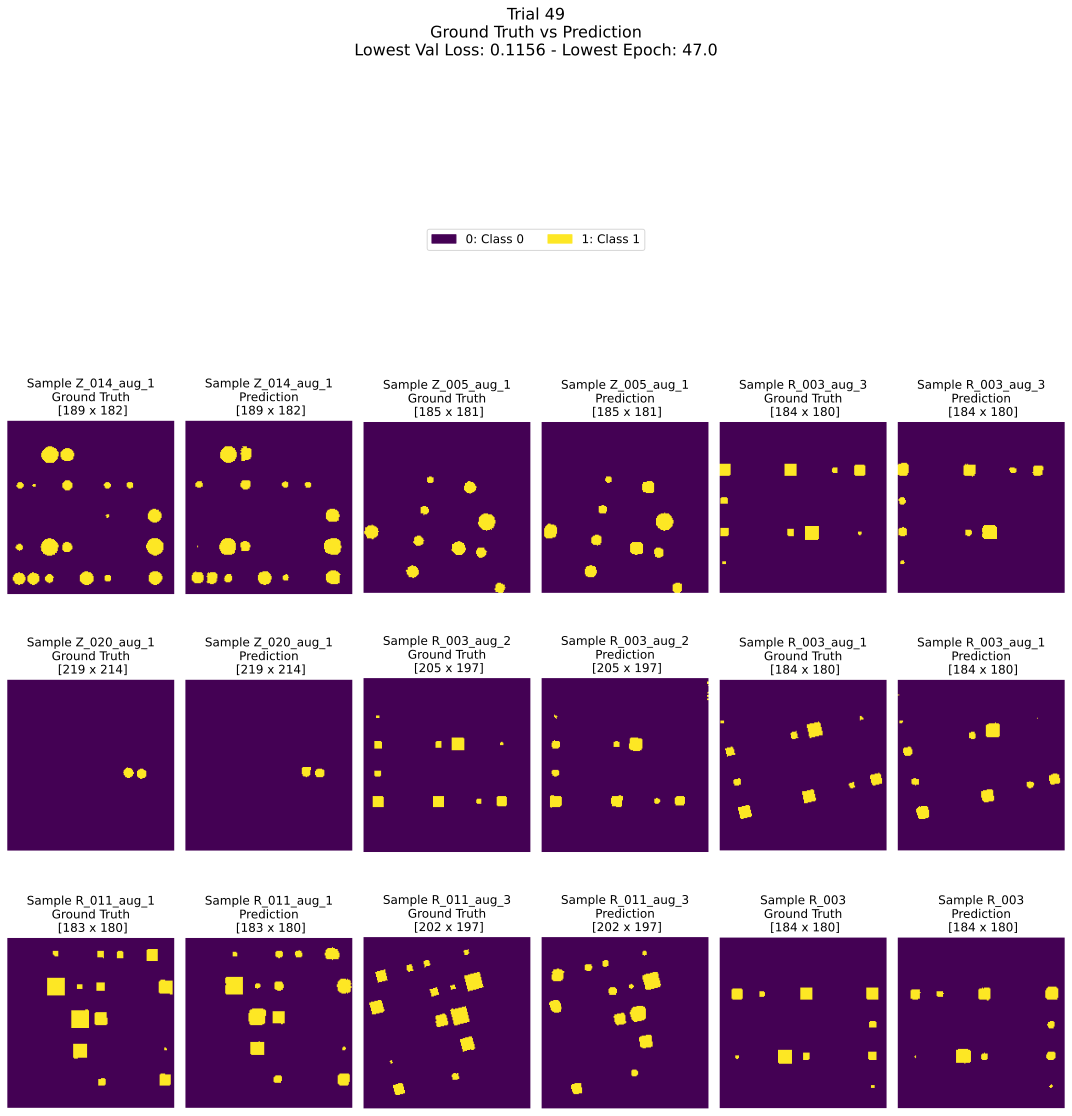

In [12]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"validation_gt_vs_pred.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

## Training vs Validation Loss Evolution

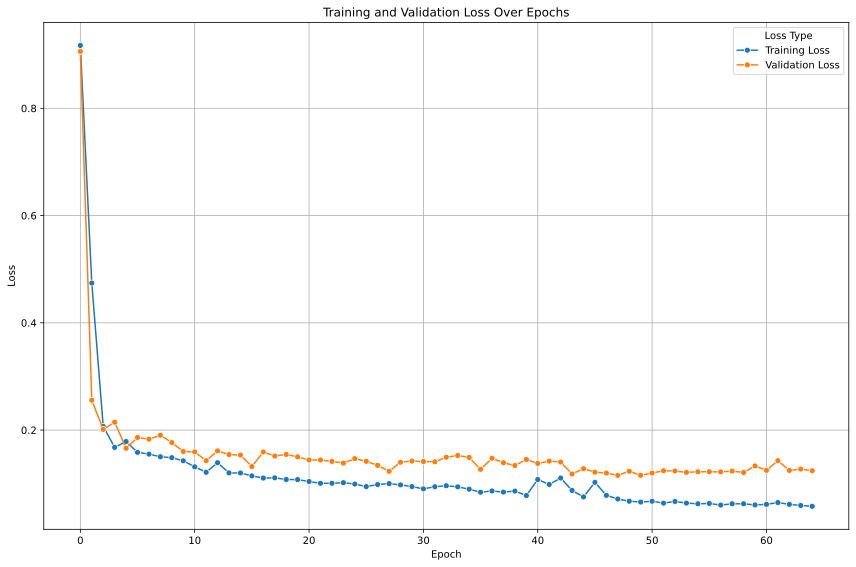

In [13]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"train_val_loss_evolution.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

# EVALUATION

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Evaluations starts at: 2025-04-03 13:12:01.863774


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

==================== TRAIN/TEST SPLIT: 0 ====================
================ Time: 2025-04-03 13:12:01.865588 ================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_007', 'R_008', 'R_009', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_015', 'Z_016', 'Z_018', 'Z_019'])



==> INCLUDING IN DATASET AUGMENTED VERSIONS FROM ORIGINAL SELECTED VIDEOS

Original selected videos: ['R_004', 'R_005', 'R_007', 'R_008', 'R_009', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_015', 'Z_016', 'Z_018', 'Z_0

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_020_aug_3 preprocessed (preprocessing took 3.50 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-03 13:17:59.058717

Total execution time for data preprocessing: 0:01:19.780549


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 117 M  | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
117 M     Trainable params
0         Non-trainable params
117 M     Total params
470.155   Total estimated model params size (MB)
287       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.943804

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.054515

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.099890

==> (VALIDATION) Average FPR (include_background=[False]): 0.038820



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.930495

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.046575

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.087008

==> (VALIDATION) Average FPR (include_background=[False]): 0.022177


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.945870

Finished training epoch 0

Starting training epoch 1...


Time limit reached. Elapsed time is 0:05:00. Signaling Trainer to stop.


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.861389

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.104016

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.184992

==> (VALIDATION) Average FPR (include_background=[False]): 0.268972


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.910833

Finished training epoch 1

Training completed in 0h 8m 46s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Lowest val_loss: 0.86138916015625 at epoch 1
JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Training and validation loss evolution plot for split 0 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_0/train_val_loss_evolution_split_0.svg


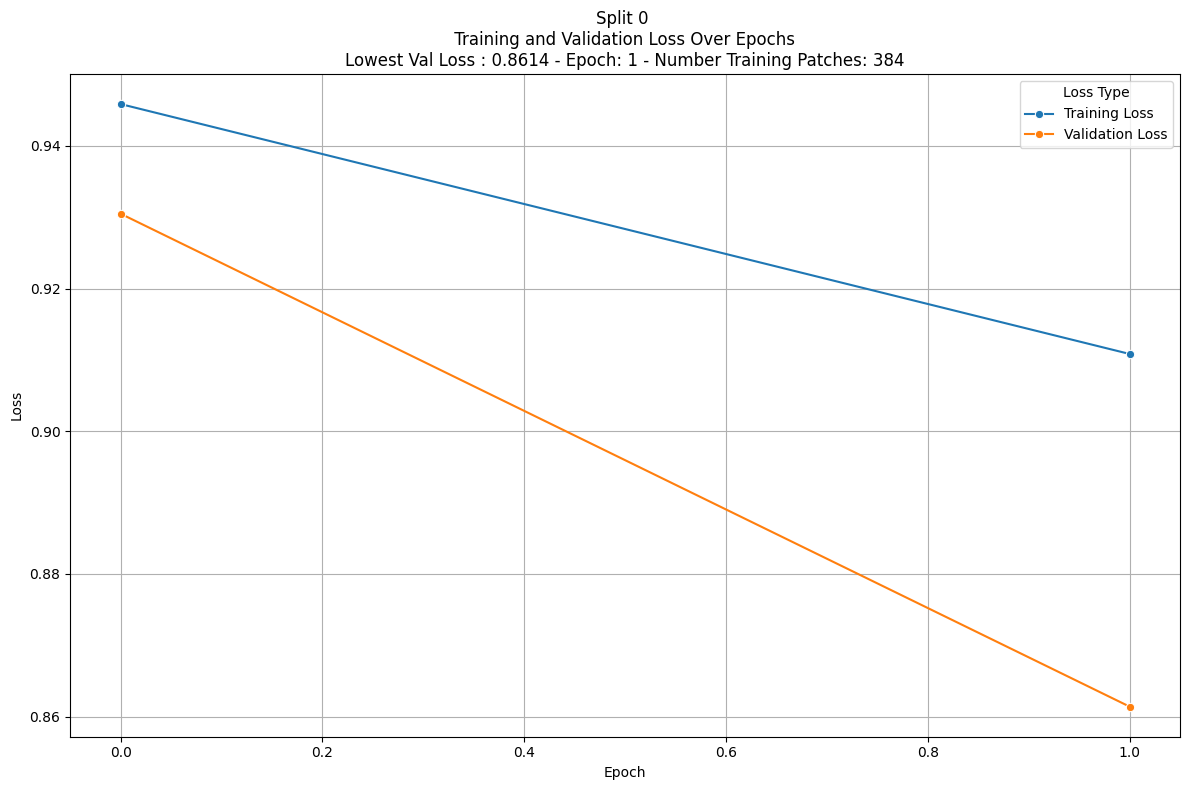


========== PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS ==========
========== GROUND TRUTH VS PREDICTIONS ==========



/tmp/ipykernel_130691/1162475269.py:337: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Validation results plot for split 0 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_0/validation_results/validation_gt_vs_pred_split_0.svg


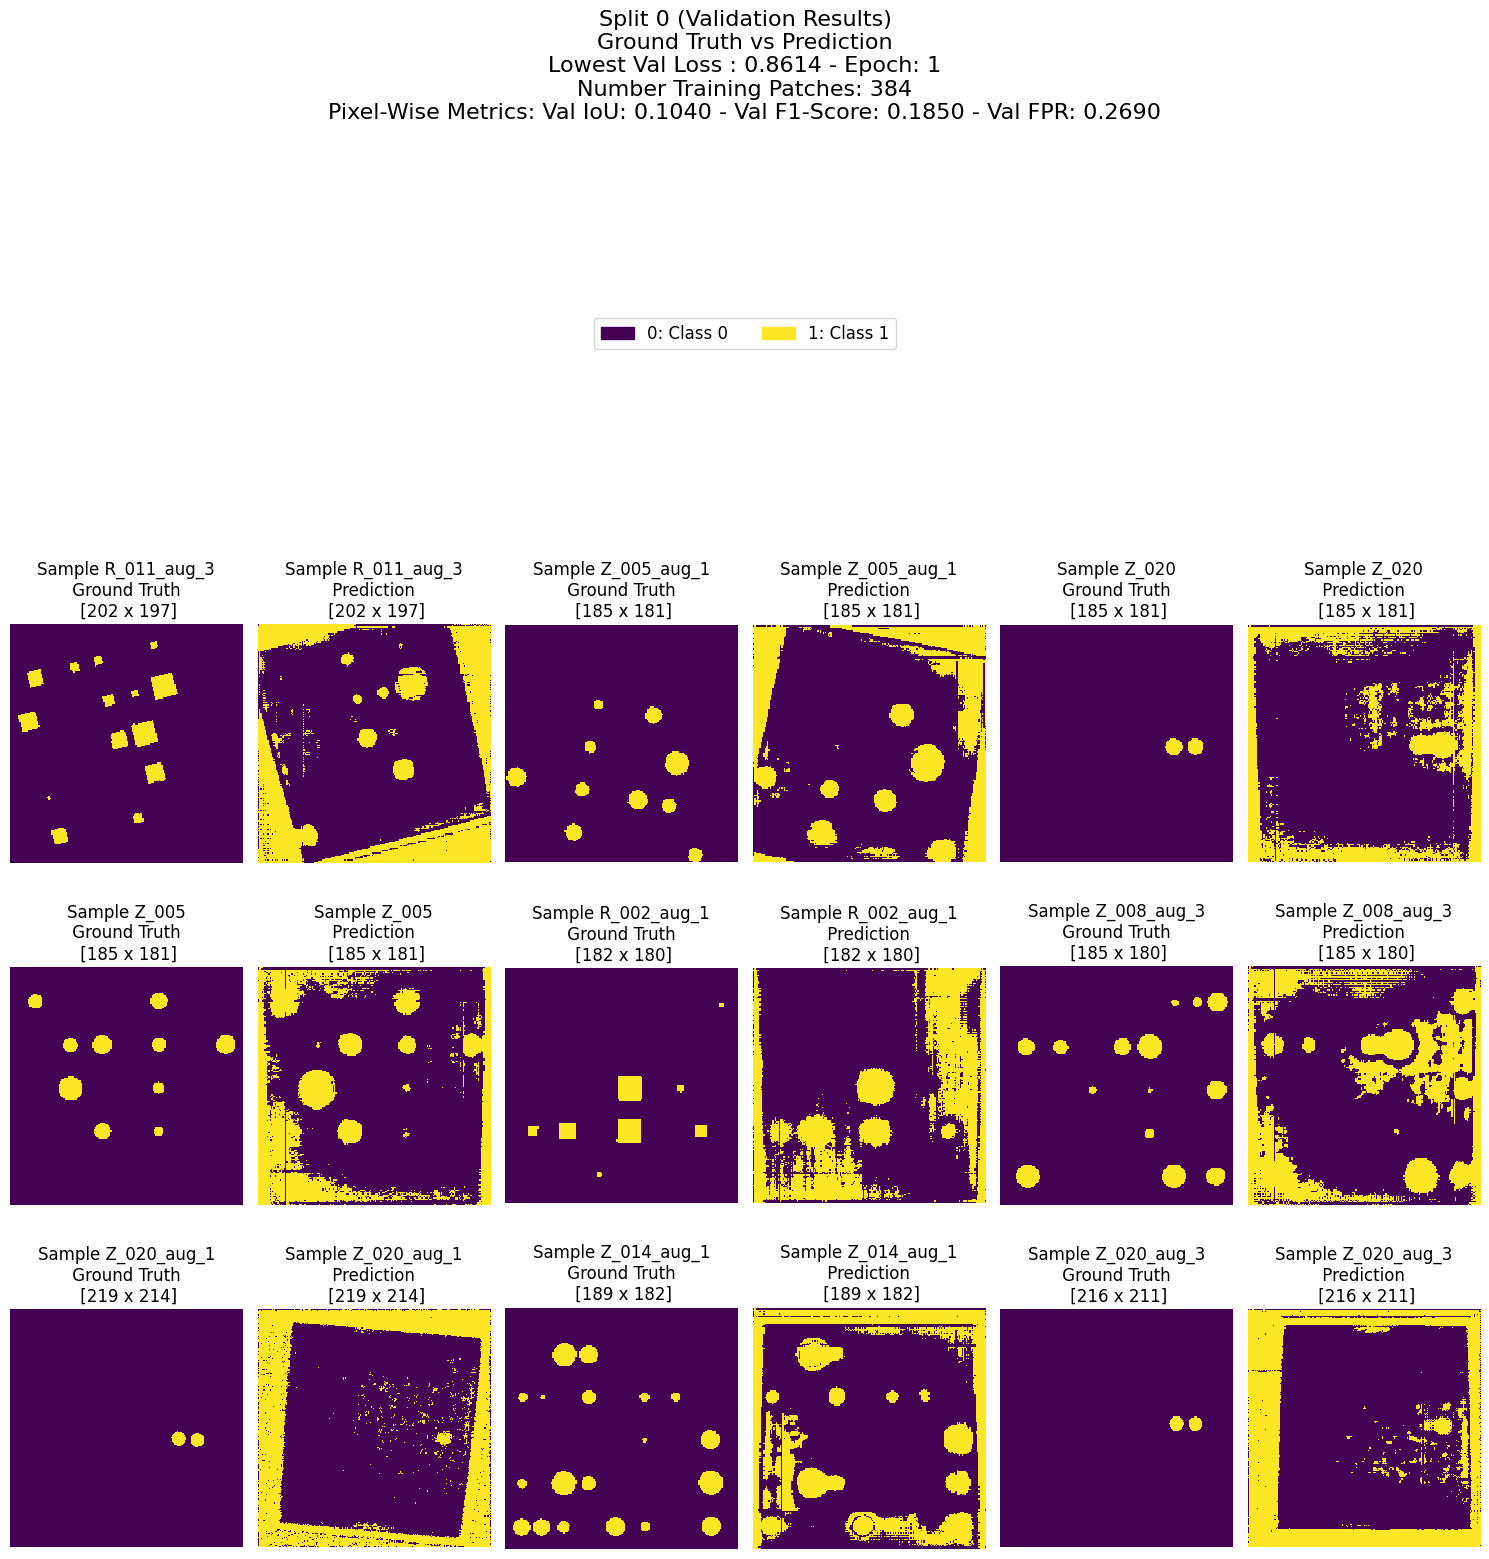


========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_006', 'R_010', 'R_012', 'Z_004', 'Z_013', 'Z_017'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-03 13:26:46.691140

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_006 ...


R_006 preprocessed (preprocessing took 1.69 seconds)


Preprocessing sample R_010 ...


R_010 preprocessed (preprocessing took 1.70 seconds)


Preprocessing sample R_012 ...


R_012 preprocessed (preprocessing took 1.66 seconds)


Preprocessing sample Z_004 ...


Z_004 prepro

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.819877

==> (TESTING) Average Mean IoU (include_background=[False]): 0.149445

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.256890

==> (TESTING) Average FPR (include_background=[False]): 0.235528

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.885410

==> (TESTING) Average Precision (include_background=[False]): 0.152790

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.2568897604942322
     test_fpr_epoch         0.2355276495218277
     test_loss_epoch        0.8198768496513367
   test_mean_iou_epoch      0.14944545924663544
  test_precision_epoch      0.152790457010

/tmp/ipykernel_130691/1162475269.py:556: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 0 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_0/testing_results/testing_gt_vs_pred_split_0.svg


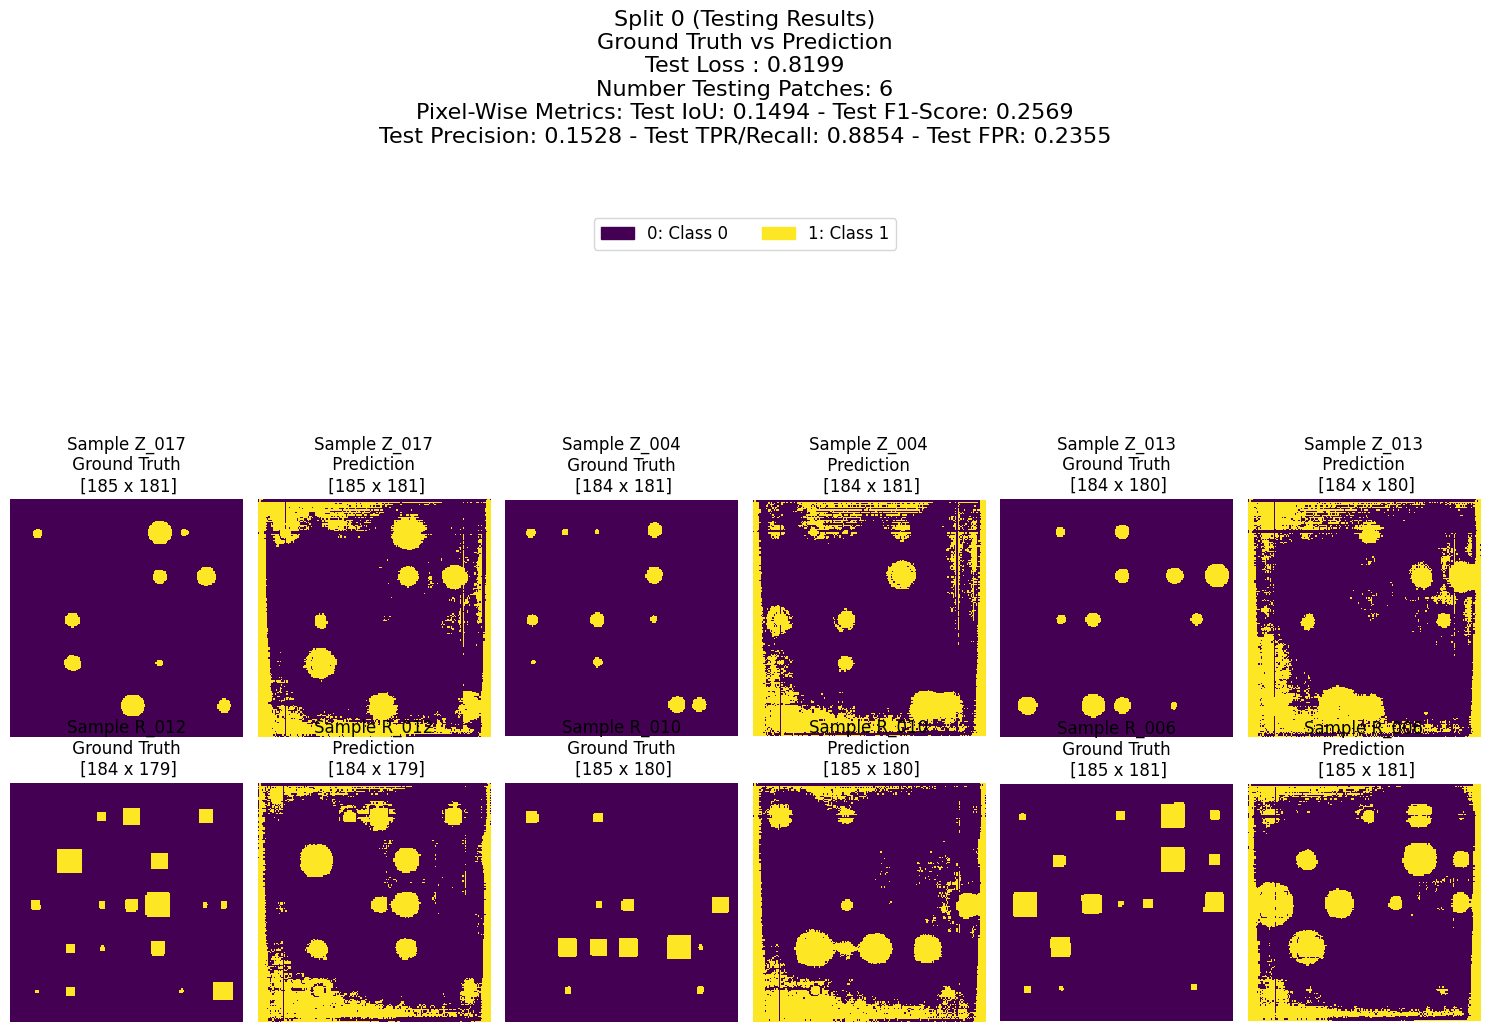

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

==================== TRAIN/TEST SPLIT: 1 ====================
================ Time: 2025-04-03 13:27:31.420360 ================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_006', 'R_007', 'R_009', 'R_010', 'R_012', 'R_013', 'R_015', 'R_016', 'R_017', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_012', 'Z_013', 'Z_017', 'Z_018', 'Z_019'])



==> INCLUDING IN DATASET AUGMENTED VERSIONS FROM ORIGINAL SELECTED VIDEOS

Original selected videos: ['R_004', 'R_005', 'R_006', 'R_007', 'R_009', 'R_010', 'R_012', 'R_013', 'R_015', 'R_016', 'R_017', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_012', 'Z_013', 'Z_017', 'Z_018', 'Z_019']

- Sample: R_004
- Augmented Video R_004_aug_1 Included
- Augmented Video R_004_aug_2 Included
- Augmented Video R_004_aug_3 Included
- Sample: R_005
- Augm

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_020_aug_3 preprocessed (preprocessing took 3.48 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-03 13:33:27.861487

Total execution time for data preprocessing: 0:01:19.114169


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 117 M  | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
117 M     Trainable params
0         Non-trainable params
117 M     Total params
470.155   Total estimated model params size (MB)
287       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.937638

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.032965

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.063825

==> (VALIDATION) Average FPR (include_background=[False]): 0.672837



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.924782

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.043122

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.081921

==> (VALIDATION) Average FPR (include_background=[False]): 0.672323


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.935548

Finished training epoch 0

Starting training epoch 1...


Time limit reached. Elapsed time is 0:05:04. Signaling Trainer to stop.


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.924782

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.043122

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.081921

==> (VALIDATION) Average FPR (include_background=[False]): 0.672323


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.883312

Finished training epoch 1

Training completed in 0h 8m 44s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Lowest val_loss: 0.9247819781303406 at epoch 0
JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Training and validation loss evolution plot for split 1 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_1/train_val_loss_evolution_split_1.svg


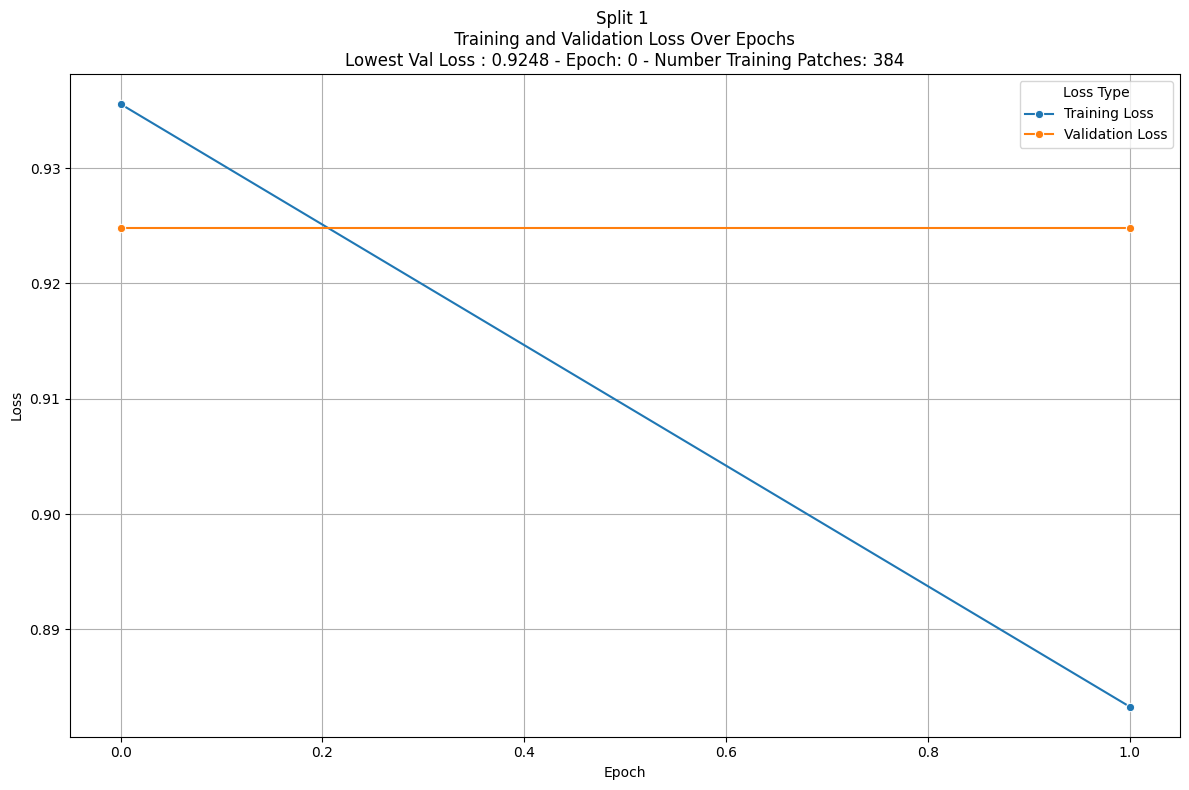


========== PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS ==========
========== GROUND TRUTH VS PREDICTIONS ==========



/tmp/ipykernel_130691/1162475269.py:337: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Validation results plot for split 1 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_1/validation_results/validation_gt_vs_pred_split_1.svg


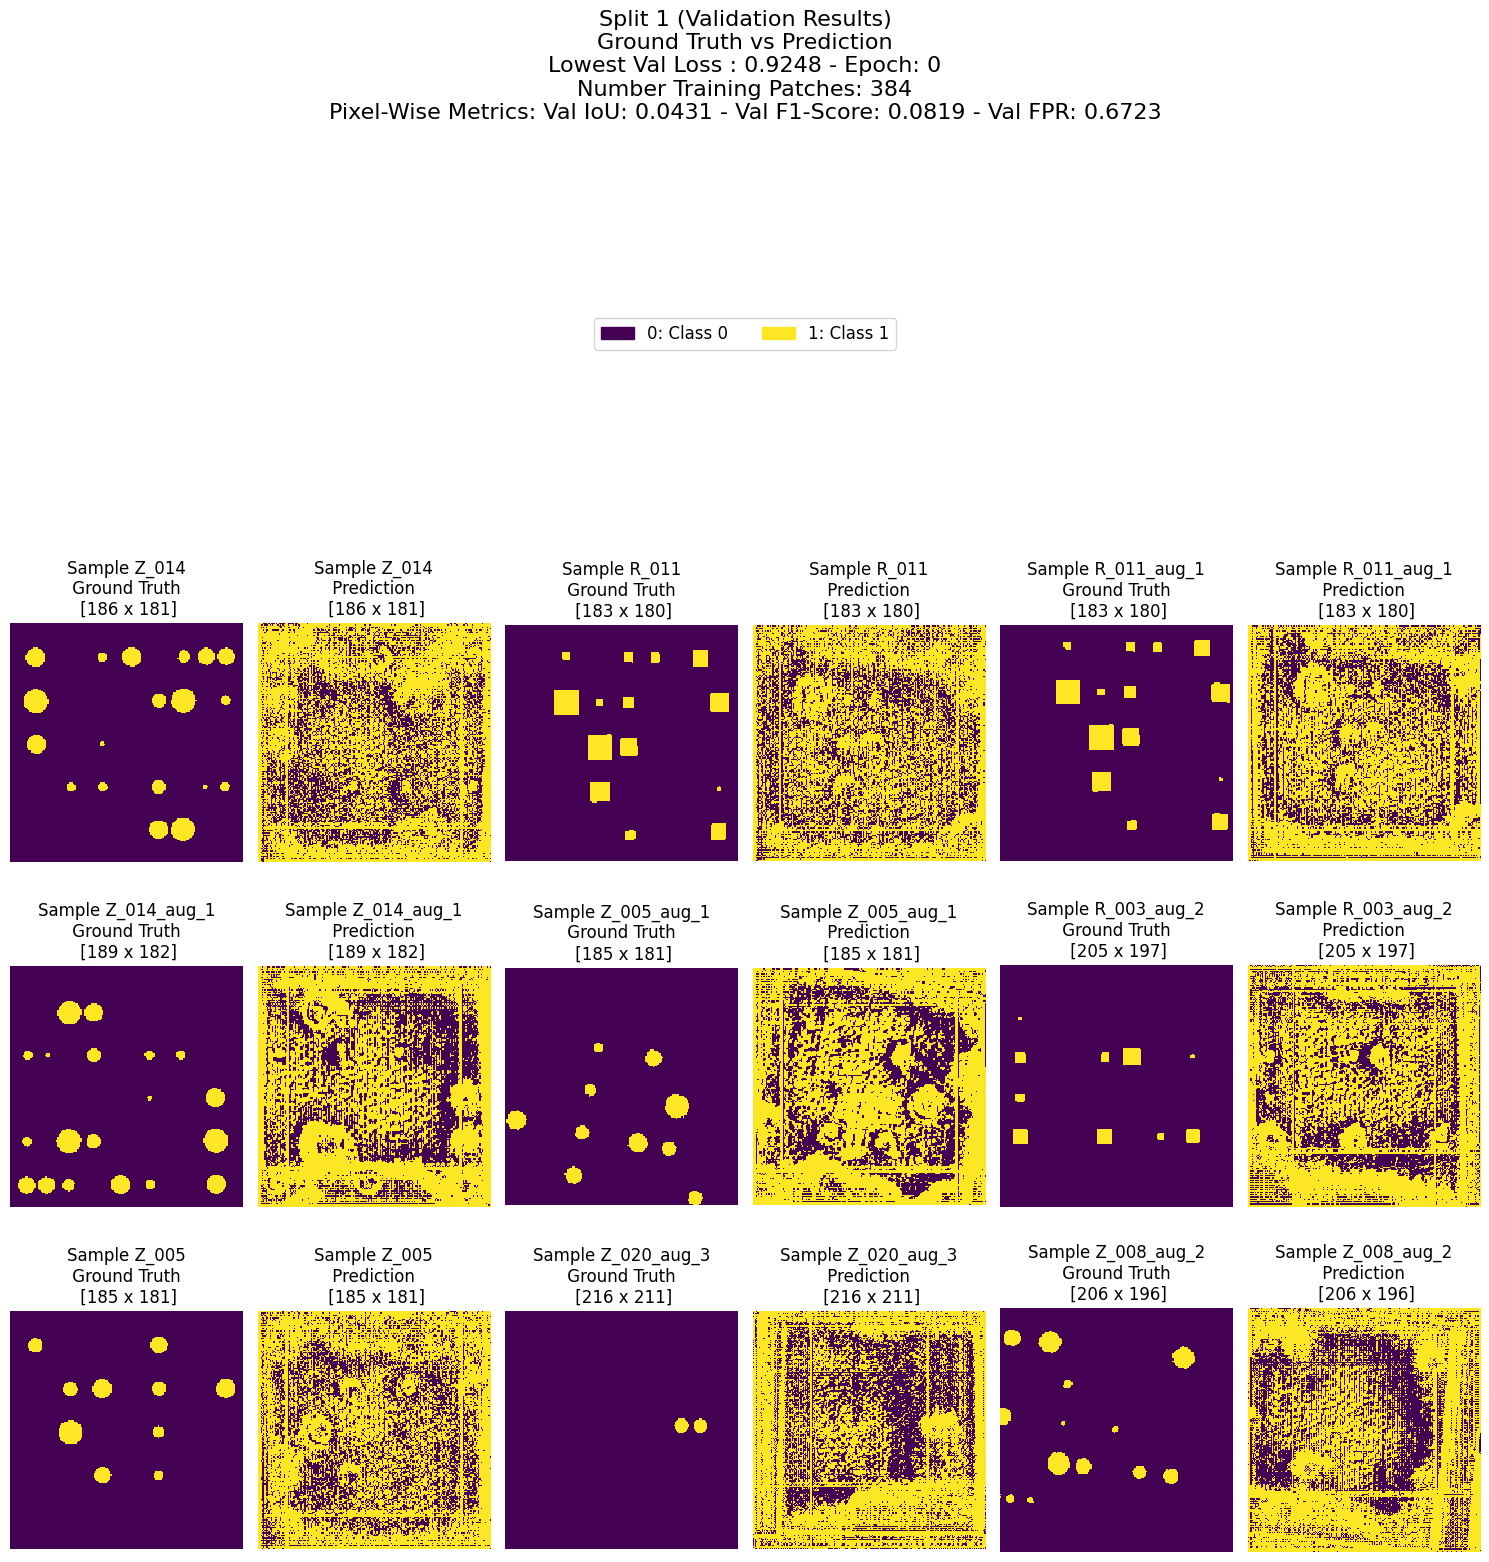


========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_008', 'R_014', 'R_019', 'Z_011', 'Z_015', 'Z_016'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-03 13:42:12.896390

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_008 ...


R_008 preprocessed (preprocessing took 1.65 seconds)


Preprocessing sample R_014 ...


R_014 preprocessed (preprocessing took 1.67 seconds)


Preprocessing sample R_019 ...


R_019 preprocessed (preprocessing took 1.66 seconds)


Preprocessing sample Z_011 ...


Z_011 prepro

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.936102

==> (TESTING) Average Mean IoU (include_background=[False]): 0.034792

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.066443

==> (TESTING) Average FPR (include_background=[False]): 0.669721

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.714681

==> (TESTING) Average Precision (include_background=[False]): 0.035416

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.06644293665885925
     test_fpr_epoch         0.6697208881378174
     test_loss_epoch         0.936102569103241
   test_mean_iou_epoch     0.034792061895132065
  test_precision_epoch     0.035415541380

/tmp/ipykernel_130691/1162475269.py:556: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 1 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_1/testing_results/testing_gt_vs_pred_split_1.svg


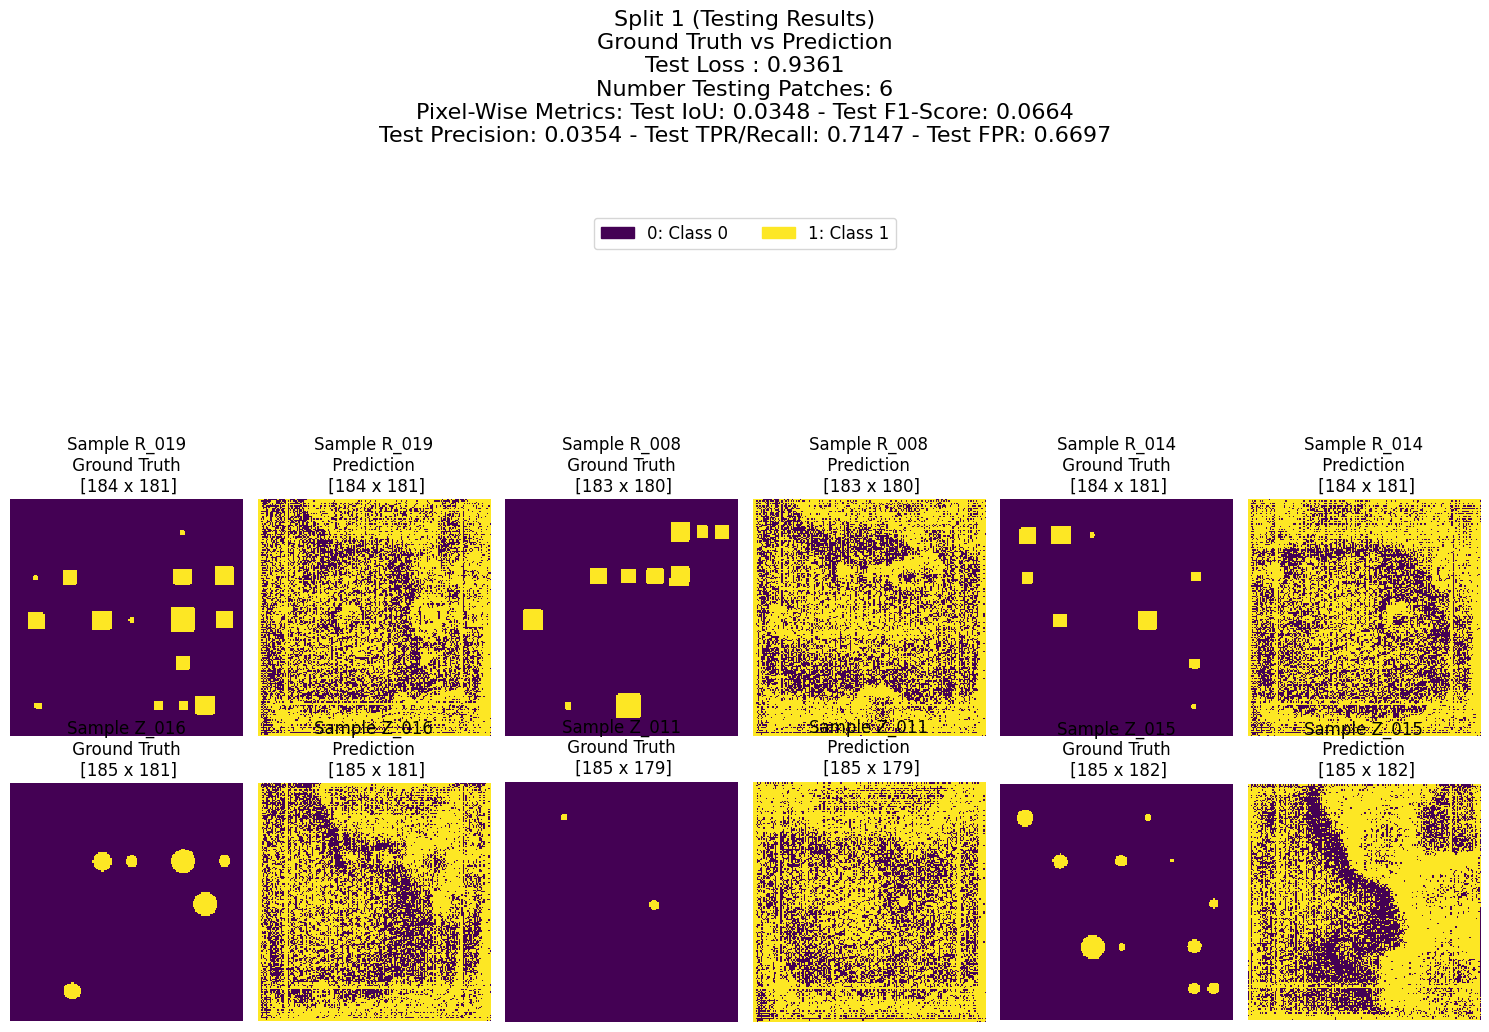

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

==================== TRAIN/TEST SPLIT: 2 ====================
================ Time: 2025-04-03 13:42:57.334446 ================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_010', 'R_012', 'R_013', 'R_014', 'R_016', 'R_017', 'R_019', 'Z_002', 'Z_003', 'Z_004', 'Z_007', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_018'])



==> INCLUDING IN DATASET AUGMENTED VERSIONS FROM ORIGINAL SELECTED VIDEOS

Original selected videos: ['R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_010', 'R_012', 'R_013', 'R_014', 'R_016', 'R_017', 'R_019', 'Z_002', 'Z_003', 'Z_004', 'Z_007', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_018']

- Sample: R_004
- Augmented Video R_004_aug_1 Included
- Augmented Video R_004_aug_2 Included
- Augmented Video R_004_aug_3 Included
- Sample: R_005
- Augm

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_020_aug_3 preprocessed (preprocessing took 3.52 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-03 13:48:51.426685

Total execution time for data preprocessing: 0:01:20.030401


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 117 M  | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
117 M     Trainable params
0         Non-trainable params
117 M     Total params
470.155   Total estimated model params size (MB)
287       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.967074

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.015331

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.030135

==> (VALIDATION) Average FPR (include_background=[False]): 0.229486



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.956295

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.015818

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.030881

==> (VALIDATION) Average FPR (include_background=[False]): 0.199151


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.959031

Finished training epoch 0

Starting training epoch 1...


Time limit reached. Elapsed time is 0:05:01. Signaling Trainer to stop.


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.956295

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.015818

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.030881

==> (VALIDATION) Average FPR (include_background=[False]): 0.199151


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.915763

Finished training epoch 1

Training completed in 0h 8m 45s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Lowest val_loss: 0.9562944769859314 at epoch 0
JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Training and validation loss evolution plot for split 2 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_2/train_val_loss_evolution_split_2.svg


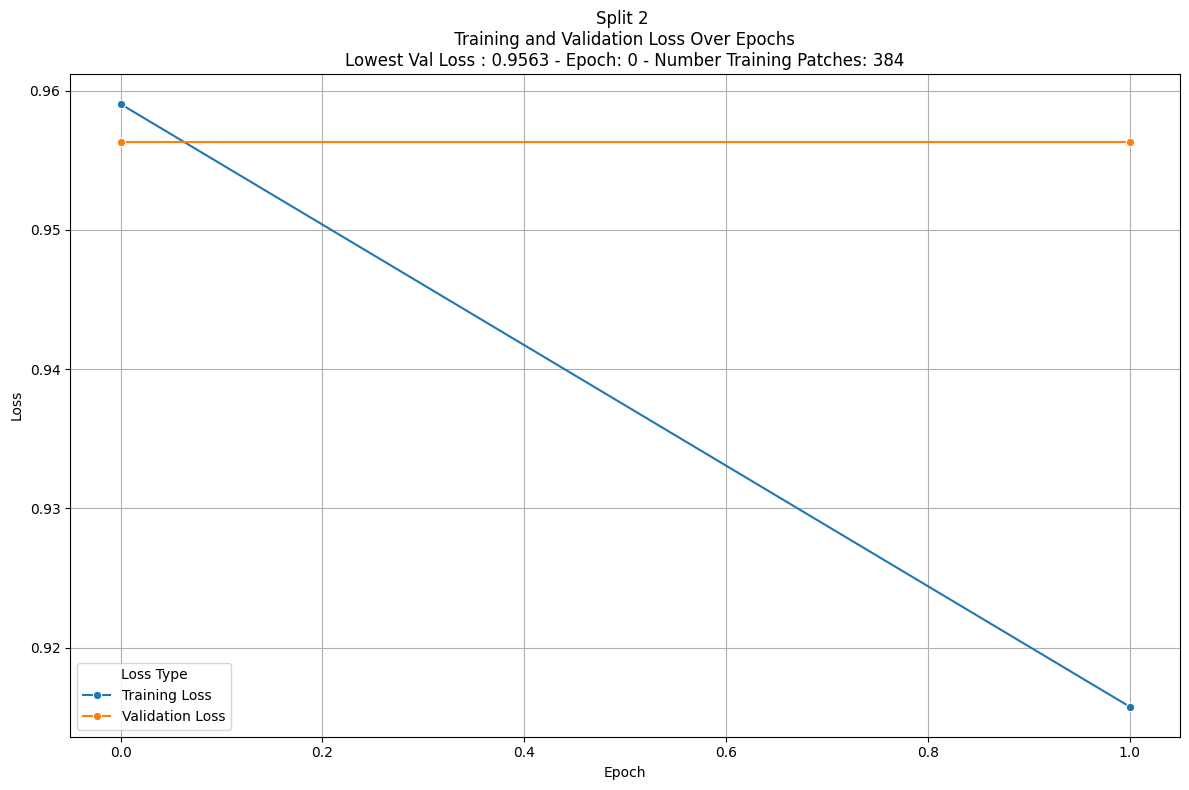


========== PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS ==========
========== GROUND TRUTH VS PREDICTIONS ==========



/tmp/ipykernel_130691/1162475269.py:337: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Validation results plot for split 2 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_2/validation_results/validation_gt_vs_pred_split_2.svg


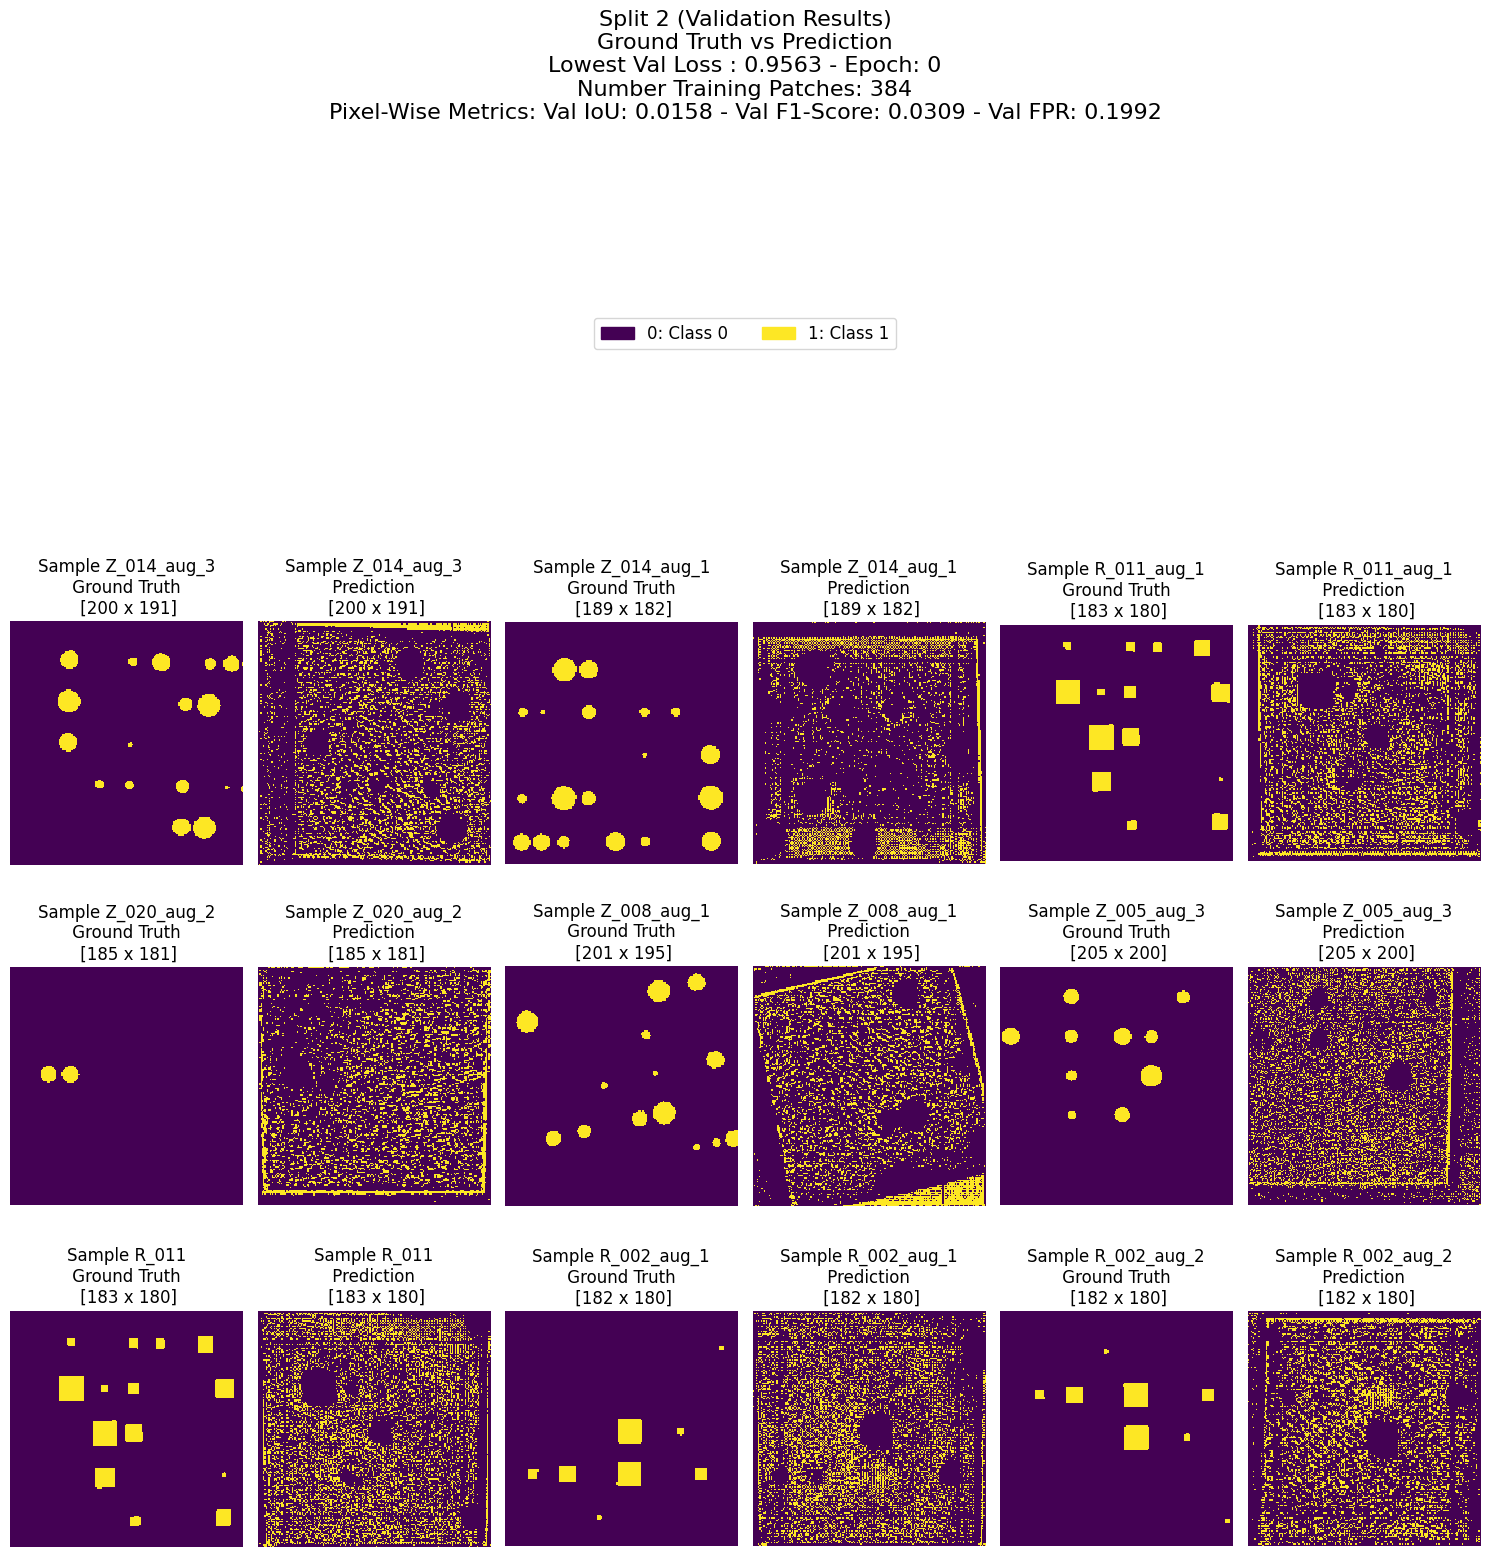


========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_009', 'R_015', 'R_020', 'Z_006', 'Z_009', 'Z_019'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-03 13:57:37.543885

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_009 ...


R_009 preprocessed (preprocessing took 1.94 seconds)


Preprocessing sample R_015 ...


R_015 preprocessed (preprocessing took 1.66 seconds)


Preprocessing sample R_020 ...


R_020 preprocessed (preprocessing took 1.65 seconds)


Preprocessing sample Z_006 ...


Z_006 prepro

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.972928

==> (TESTING) Average Mean IoU (include_background=[False]): 0.009340

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.018434

==> (TESTING) Average FPR (include_background=[False]): 0.222563

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.087742

==> (TESTING) Average Precision (include_background=[False]): 0.010518

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.01843411661684513
     test_fpr_epoch         0.22256338596343994
     test_loss_epoch        0.9729277491569519
   test_mean_iou_epoch     0.009340179152786732
  test_precision_epoch     0.01051808148

/tmp/ipykernel_130691/1162475269.py:556: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 2 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_2/testing_results/testing_gt_vs_pred_split_2.svg


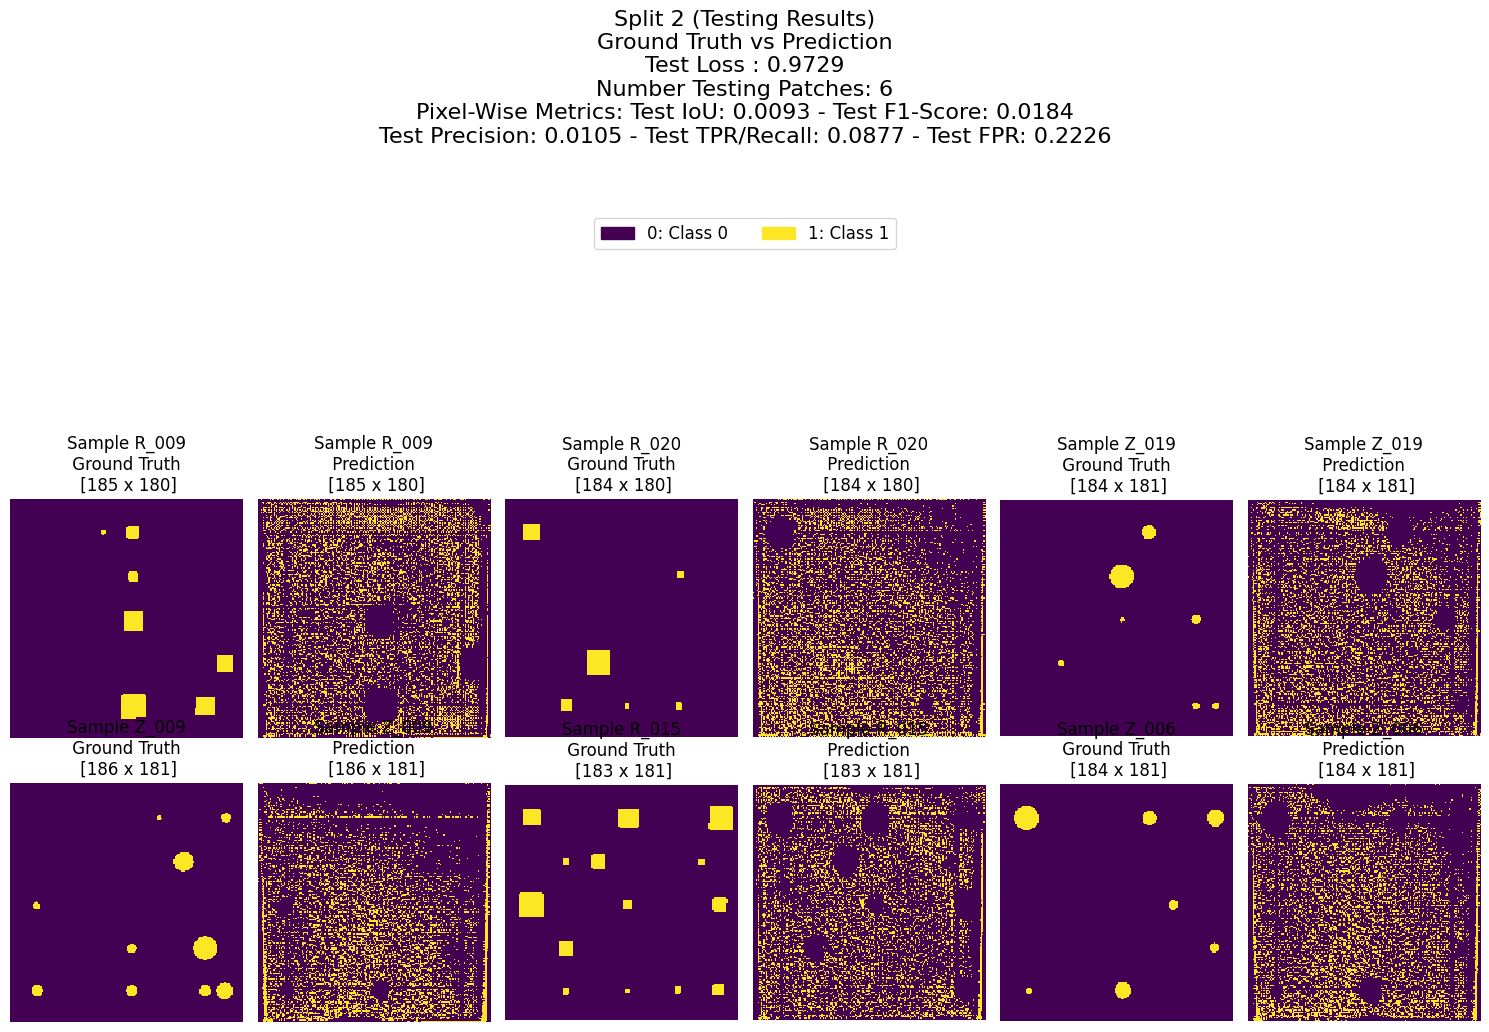

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

==================== TRAIN/TEST SPLIT: 3 ====================
================ Time: 2025-04-03 13:58:23.457506 ================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_012', 'R_013', 'R_014', 'R_015', 'R_017', 'R_019', 'R_020', 'Z_003', 'Z_004', 'Z_006', 'Z_009', 'Z_011', 'Z_012', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019'])



==> INCLUDING IN DATASET AUGMENTED VERSIONS FROM ORIGINAL SELECTED VIDEOS

Original selected videos: ['R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_012', 'R_013', 'R_014', 'R_015', 'R_017', 'R_019', 'R_020', 'Z_003', 'Z_004', 'Z_006', 'Z_009', 'Z_011', 'Z_012', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019']

- Sample: R_006
- Augmented Video R_006_aug_1 Included
- Augmented Video R_006_aug_2 Included
- Augmented Video R_006_aug_3 Included
- Sample: R_007
- Augm

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_020_aug_3 preprocessed (preprocessing took 3.50 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-03 14:04:18.513504

Total execution time for data preprocessing: 0:01:19.832745


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 117 M  | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
117 M     Trainable params
0         Non-trainable params
117 M     Total params
470.155   Total estimated model params size (MB)
287       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.950909

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.019249

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.037751

==> (VALIDATION) Average FPR (include_background=[False]): 0.723567



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.938182

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.024991

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.048363

==> (VALIDATION) Average FPR (include_background=[False]): 0.700293


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.941048

Finished training epoch 0

Starting training epoch 1...


Time limit reached. Elapsed time is 0:05:02. Signaling Trainer to stop.


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.938182

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.024991

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.048363

==> (VALIDATION) Average FPR (include_background=[False]): 0.700293


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.971251

Finished training epoch 1

Training completed in 0h 8m 47s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Lowest val_loss: 0.938181459903717 at epoch 0
JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Training and validation loss evolution plot for split 3 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_3/train_val_loss_evolution_split_3.svg


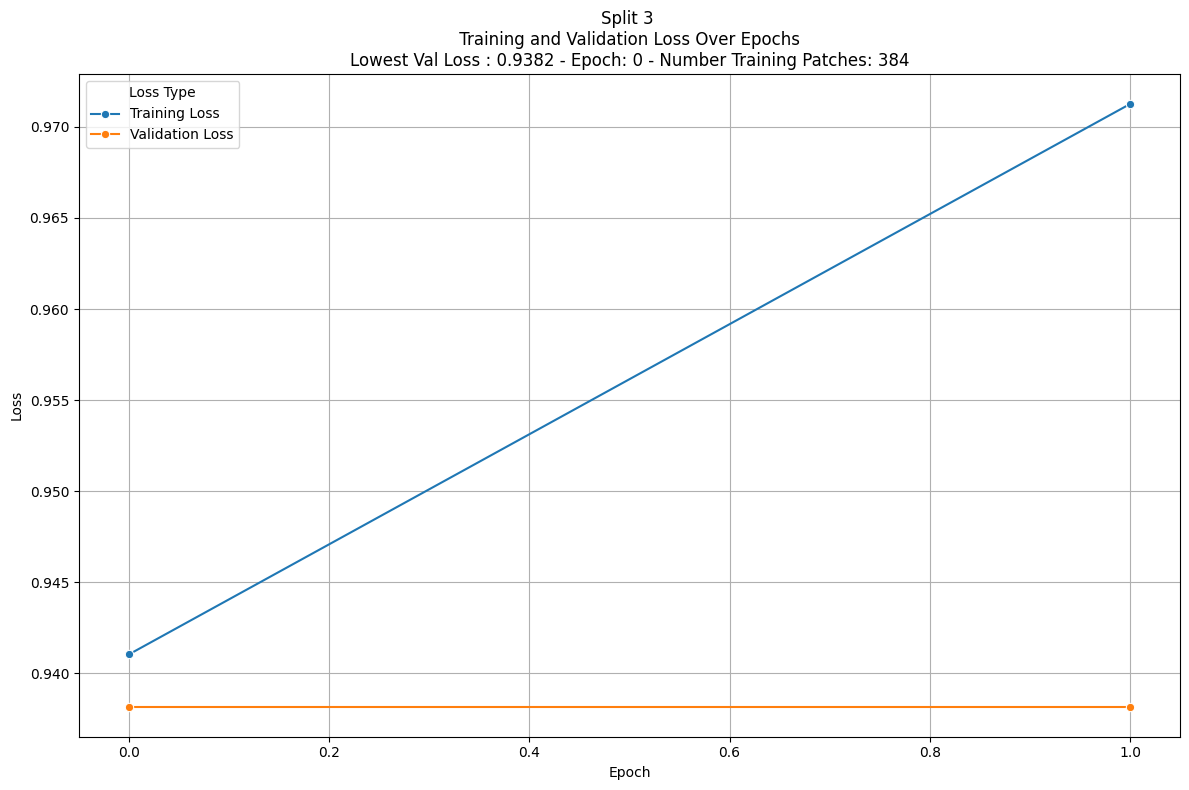


========== PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS ==========
========== GROUND TRUTH VS PREDICTIONS ==========



/tmp/ipykernel_130691/1162475269.py:337: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Validation results plot for split 3 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_3/validation_results/validation_gt_vs_pred_split_3.svg


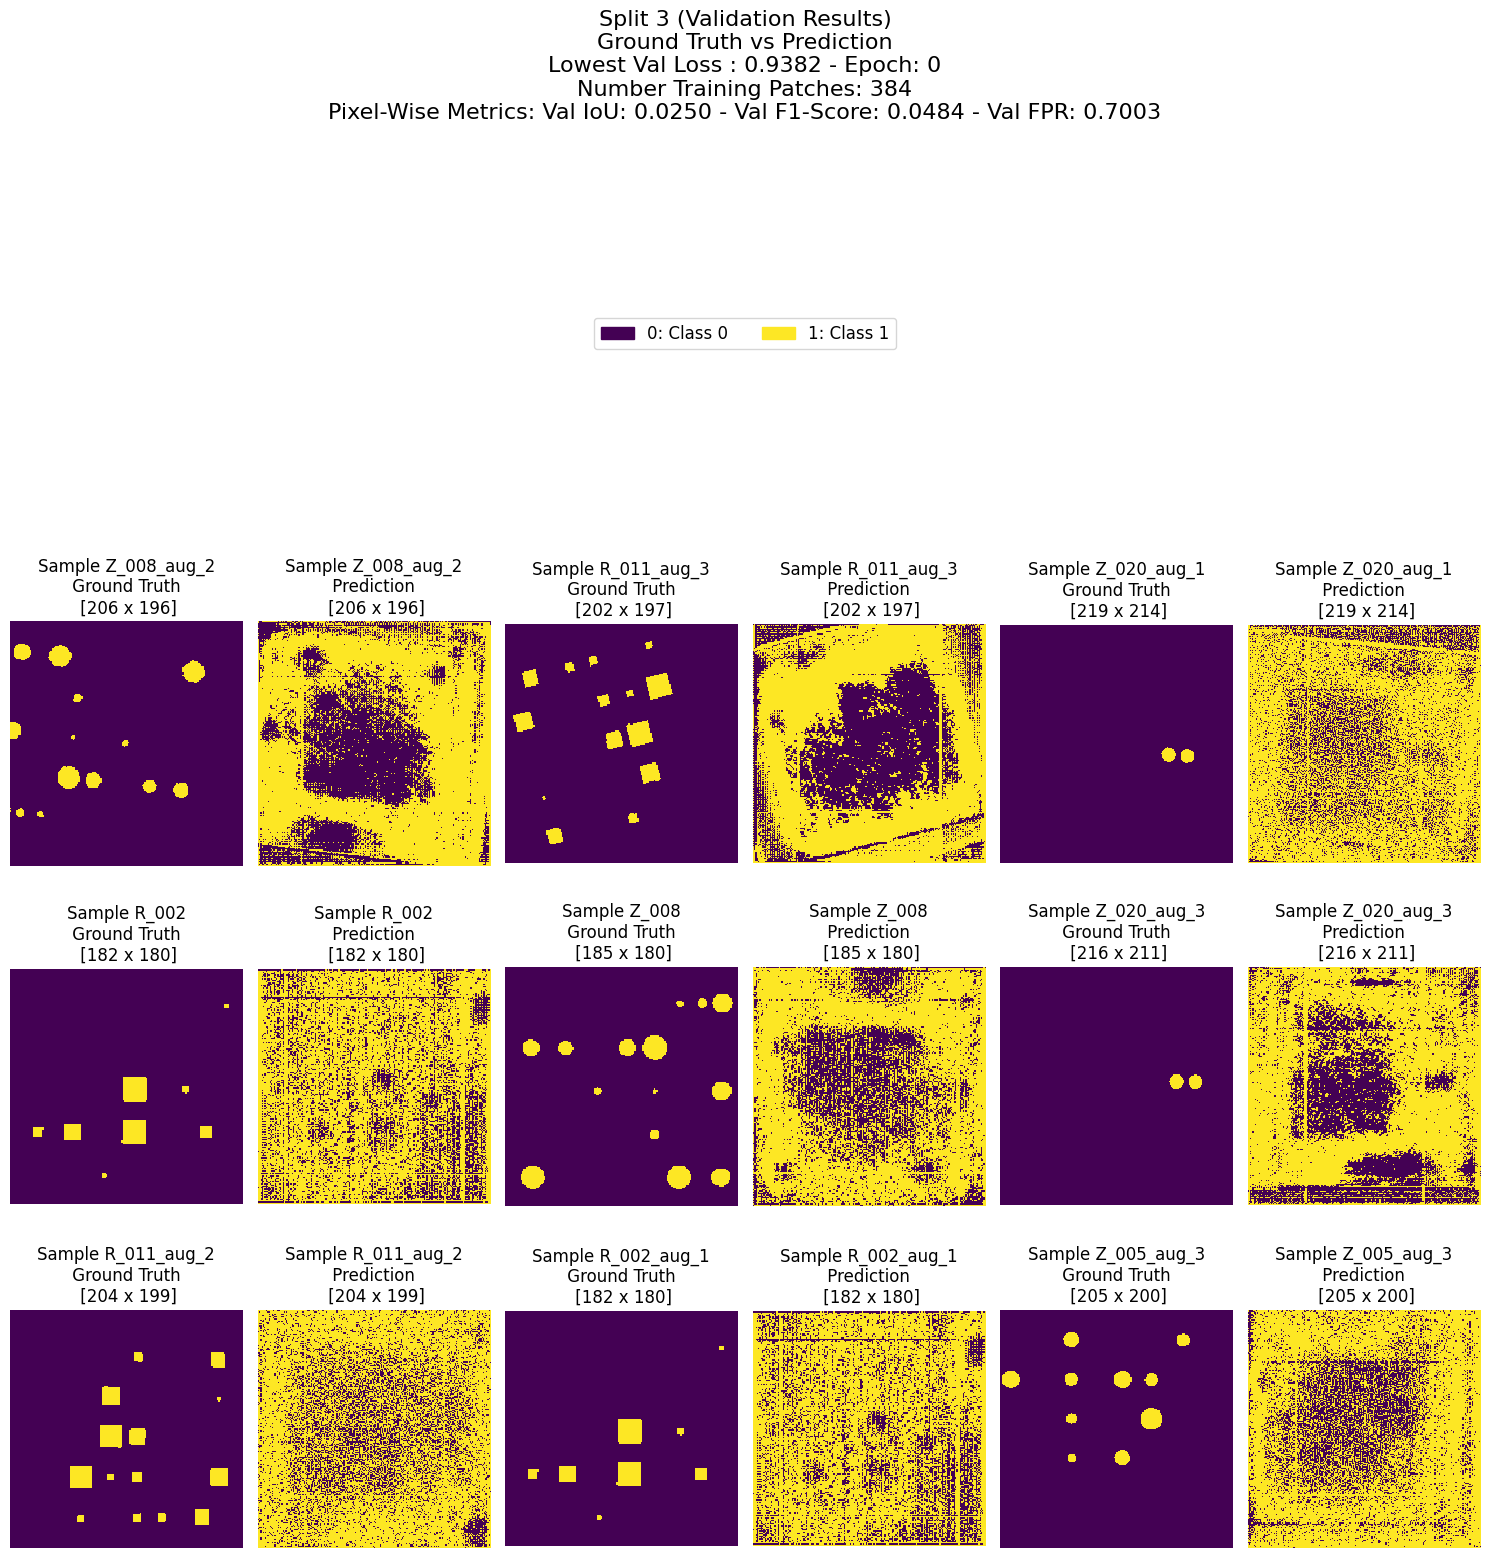


========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_016', 'Z_002', 'Z_007', 'Z_010'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-03 14:13:06.495333

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_004 ...


R_004 preprocessed (preprocessing took 1.94 seconds)


Preprocessing sample R_005 ...


R_005 preprocessed (preprocessing took 1.81 seconds)


Preprocessing sample R_016 ...


R_016 preprocessed (preprocessing took 1.70 seconds)


Preprocessing sample Z_002 ...


Z_002 prepro

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.967957

==> (TESTING) Average Mean IoU (include_background=[False]): 0.014134

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.027430

==> (TESTING) Average FPR (include_background=[False]): 0.695675

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.526664

==> (TESTING) Average Precision (include_background=[False]): 0.014556

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.02743043191730976
     test_fpr_epoch         0.6956746578216553
     test_loss_epoch         0.967957079410553
   test_mean_iou_epoch     0.014134284108877182
  test_precision_epoch     0.014556360431

/tmp/ipykernel_130691/1162475269.py:556: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 3 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_3/testing_results/testing_gt_vs_pred_split_3.svg


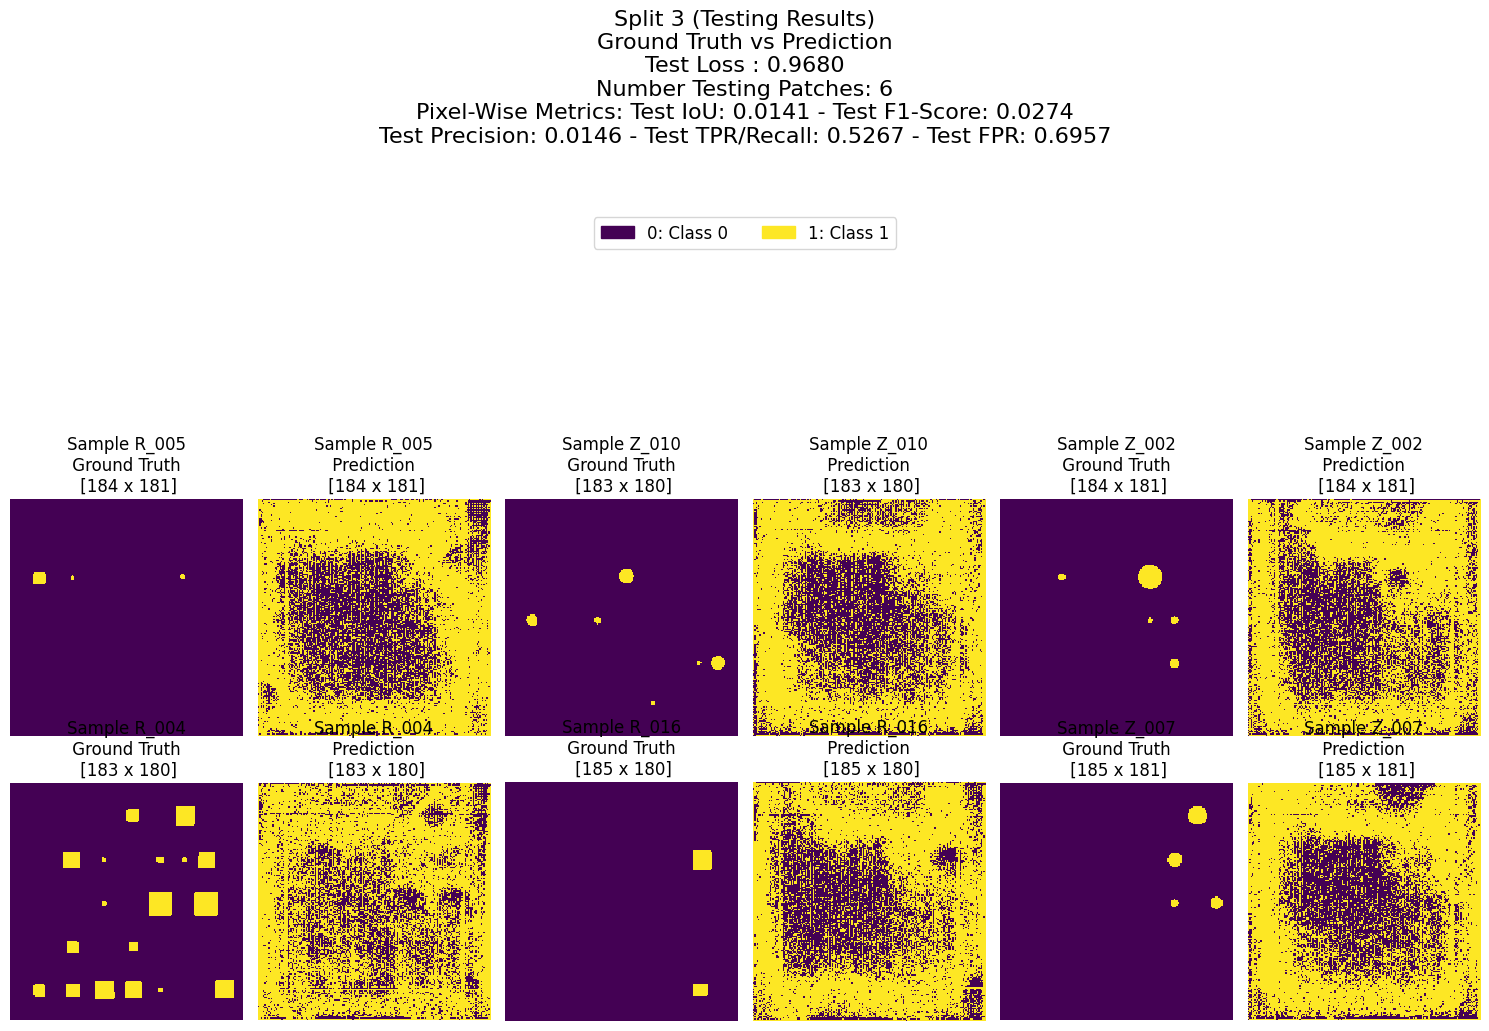

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

==================== TRAIN/TEST SPLIT: 4 ====================
================ Time: 2025-04-03 14:13:52.663164 ================


===============> TRAINING DATA PREPARATION

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_006', 'R_008', 'R_009', 'R_010', 'R_012', 'R_014', 'R_015', 'R_016', 'R_019', 'R_020', 'Z_002', 'Z_004', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_019'])



==> INCLUDING IN DATASET AUGMENTED VERSIONS FROM ORIGINAL SELECTED VIDEOS

Original selected videos: ['R_004', 'R_005', 'R_006', 'R_008', 'R_009', 'R_010', 'R_012', 'R_014', 'R_015', 'R_016', 'R_019', 'R_020', 'Z_002', 'Z_004', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_013', 'Z_015', 'Z_016', 'Z_017', 'Z_019']

- Sample: R_004
- Augmented Video R_004_aug_1 Included
- Augmented Video R_004_aug_2 Included
- Augmented Video R_004_aug_3 Included
- Sample: R_005
- Augm

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Z_020_aug_3 preprocessed (preprocessing took 3.50 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-04-03 14:19:44.277623

Total execution time for data preprocessing: 0:01:18.745242


JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json

========== TRAINING STARTS ==========



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type           | Params | Mode 
---------------------------------------------------
0 | model   | SwinUNETR_AIRT | 117 M  | train
1 | loss_fn | DiceLoss       | 0      | train
---------------------------------------------------
117 M     Trainable params
0         Non-trainable params
117 M     Total params
470.155   Total estimated model params size (MB)
287       Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.938389

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.035918

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.069250

==> (VALIDATION) Average FPR (include_background=[False]): 0.531541



Training: |                                                                                                   …

Starting training epoch 0...


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.926125

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.044229

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.083797

==> (VALIDATION) Average FPR (include_background=[False]): 0.485921


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.939525

Finished training epoch 0

Starting training epoch 1...


Time limit reached. Elapsed time is 0:05:00. Signaling Trainer to stop.


Validation: |                                                                                                 …


==> (VALIDATION) Average Dice Loss (include_background=[False]): 0.877732

==> (VALIDATION) Average Mean IoU (include_background=[False]): 0.075273

==> (VALIDATION) Average Dice Coefficient (include_background=[False]): 0.137806

==> (VALIDATION) Average FPR (include_background=[False]): 0.437373


==> (TRAINING) Average Dice Loss (Patch Level) (include_background=[False]): 0.927128

Finished training epoch 1

Training completed in 0h 8m 42s

========== TRAINING FINISHED ==========


========== PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION ==========

Lowest val_loss: 0.8777323961257935 at epoch 1
JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json
Training and validation loss evolution plot for split 4 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_4/train_val_loss_evolution_split_4.svg


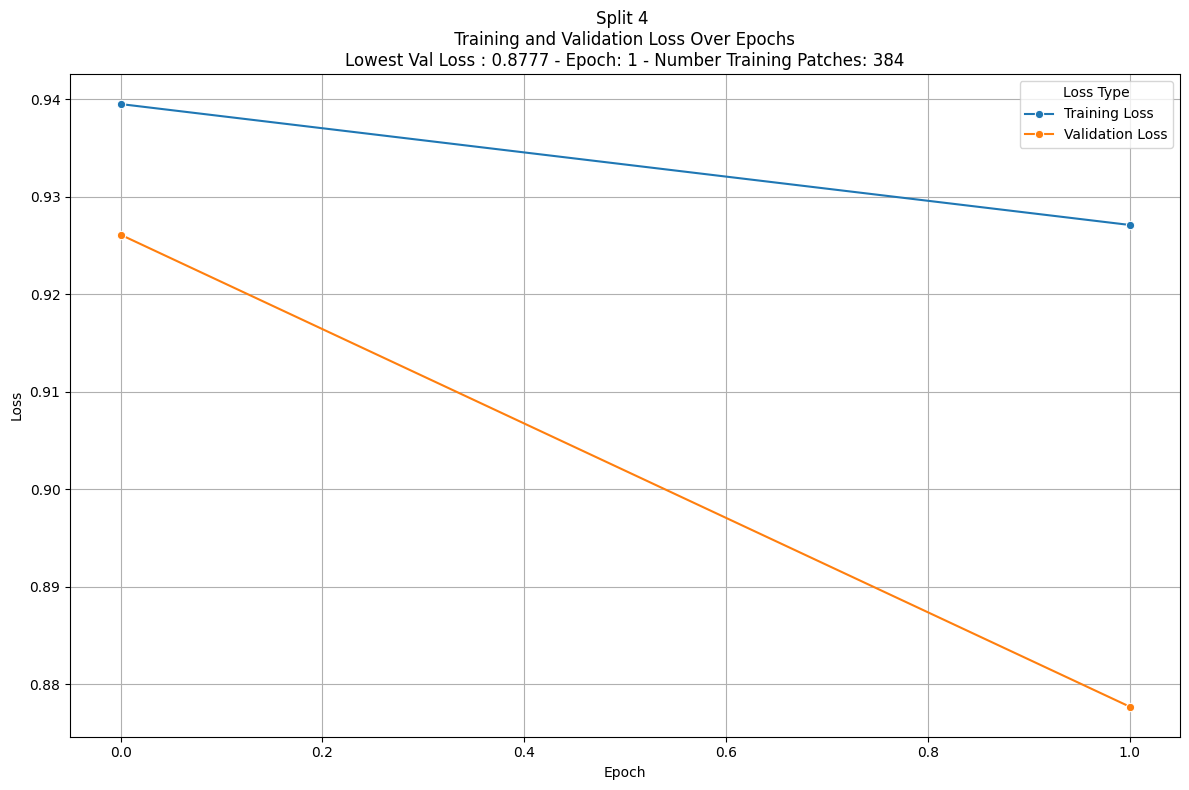


========== PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS ==========
========== GROUND TRUTH VS PREDICTIONS ==========



/tmp/ipykernel_130691/1162475269.py:337: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Validation results plot for split 4 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_4/validation_results/validation_gt_vs_pred_split_4.svg


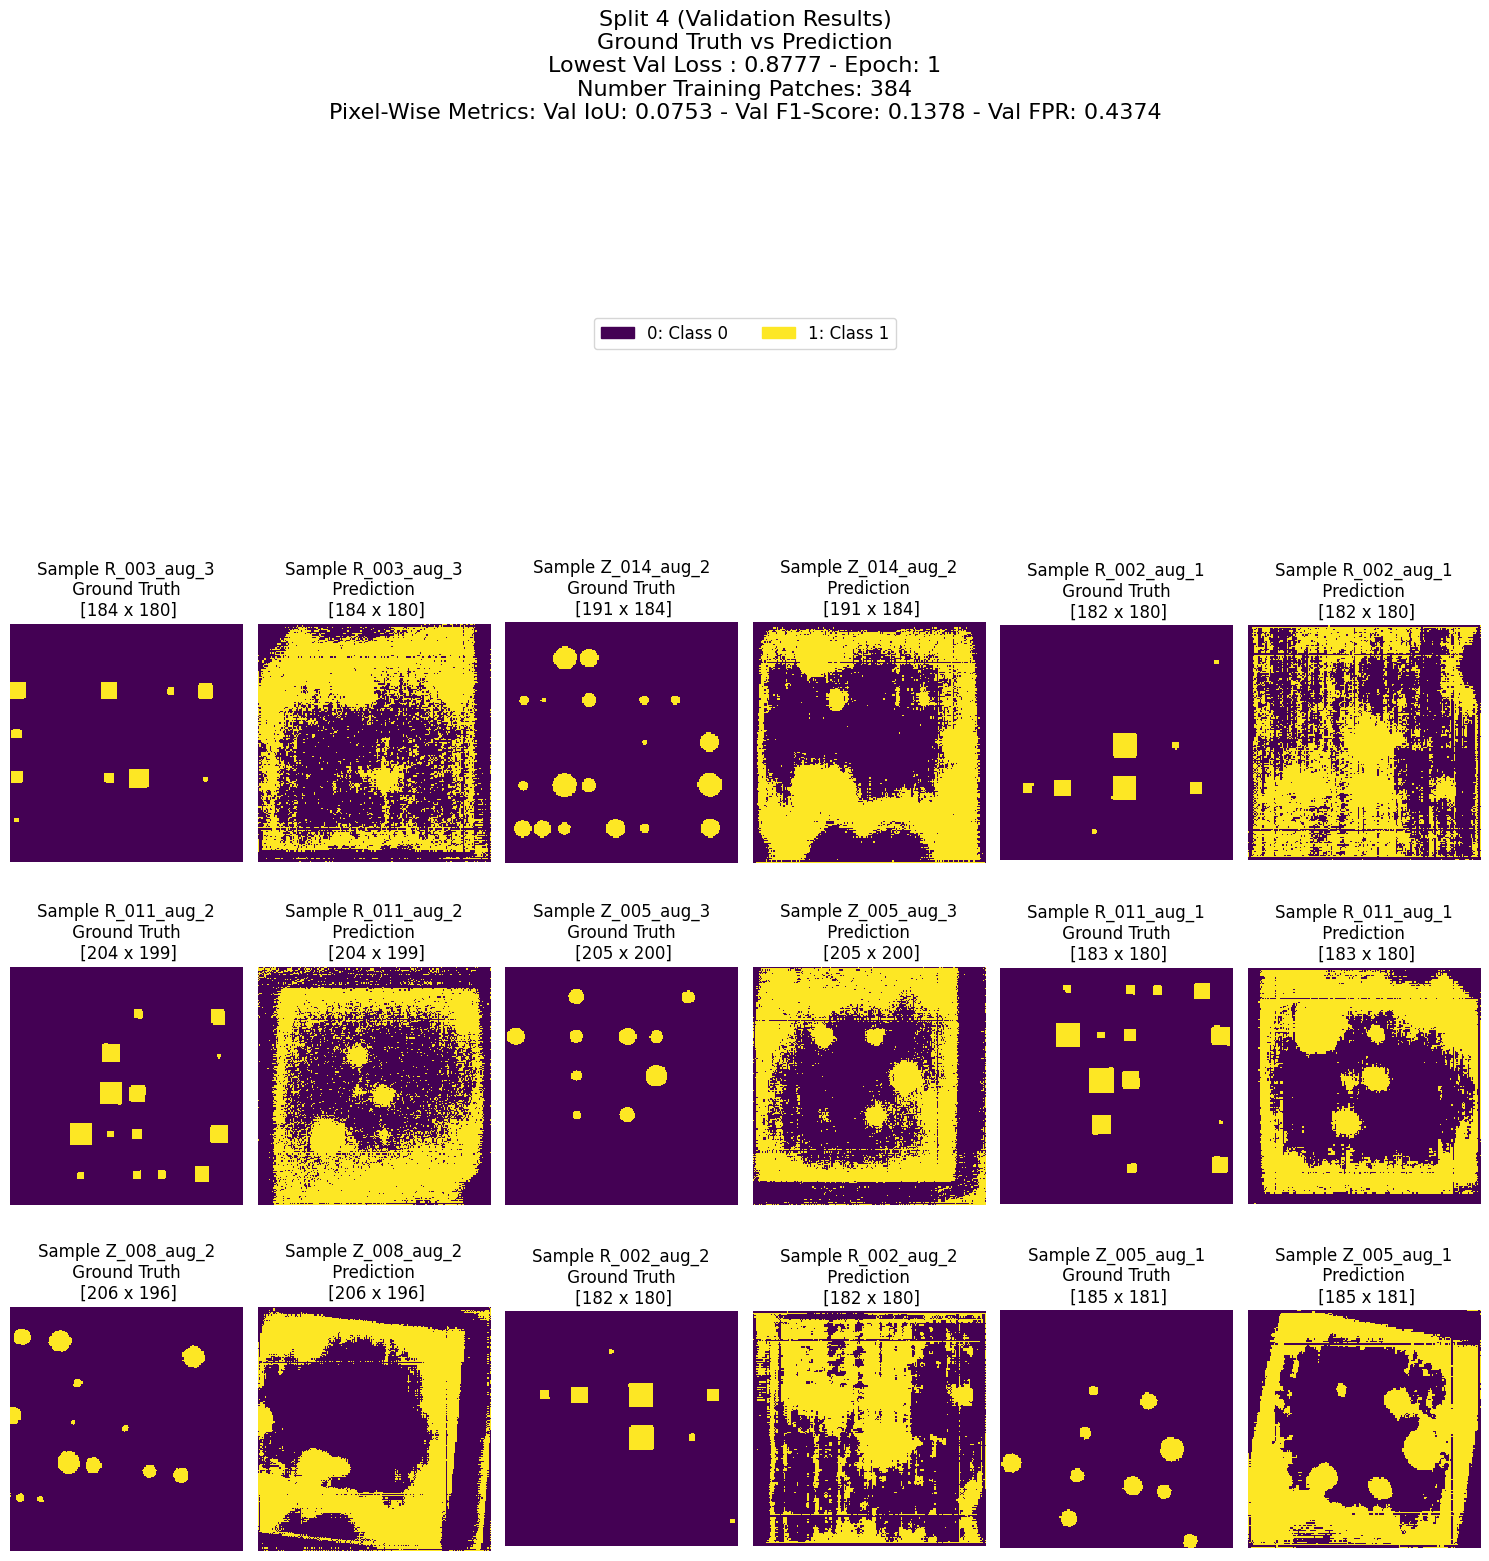


========== TESTING DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_007', 'R_013', 'R_017', 'Z_003', 'Z_012', 'Z_018'])

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-04-03 14:28:27.176350

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_007 ...


R_007 preprocessed (preprocessing took 1.71 seconds)


Preprocessing sample R_013 ...


R_013 preprocessed (preprocessing took 1.76 seconds)


Preprocessing sample R_017 ...


R_017 preprocessed (preprocessing took 1.77 seconds)


Preprocessing sample Z_003 ...


Z_003 prepro

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.895583

==> (TESTING) Average Mean IoU (include_background=[False]): 0.063713

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.115217

==> (TESTING) Average FPR (include_background=[False]): 0.467566

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.837460

==> (TESTING) Average Precision (include_background=[False]): 0.064814

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.11521681398153305
     test_fpr_epoch         0.4675655663013458
     test_loss_epoch         0.89558345079422
   test_mean_iou_epoch      0.06371349841356277
  test_precision_epoch      0.064814068377

/tmp/ipykernel_130691/1162475269.py:556: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


Testing results plot for split 4 saved at: executions/swin_unetr_v2/tuning-train-test/id=175/train_test_split_4/testing_results/testing_gt_vs_pred_split_4.svg


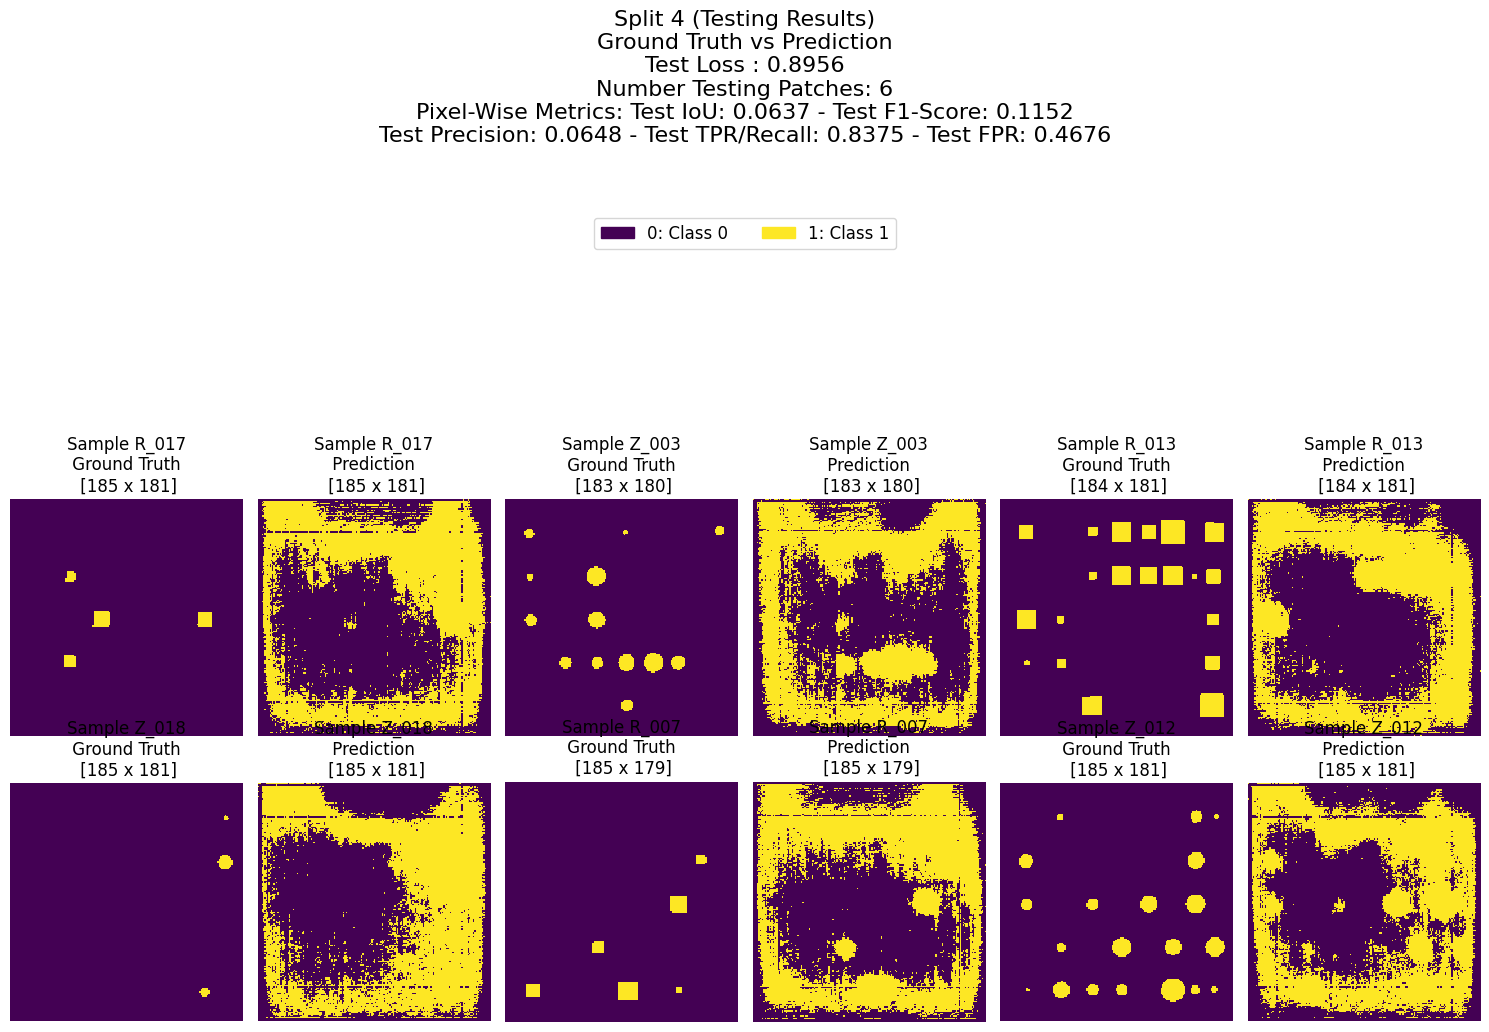

JSON file successfully updated at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_summary.json


In [14]:
def update_evaluation_summary_json_file(data):
    """
    Overwrites the JSON file on disk with the updated data.

    Parameters:
    - data (dict): The updated dictionary to write to the file.
    """
    try:
        # Ensure the directory exists
        json_path = os.path.join(execution_dir, "evaluation_summary.json")

        # Write the updated data to the file, overwriting it
        with open(json_path, 'w') as json_file:
            json.dump(data, json_file, indent=4)

        print(f"JSON file successfully updated at: {json_path}")

    except Exception as e:
        print(f"An error occurred while updating the JSON file: {e}")

# Generate the evaluation summary
evaluation_summary = {
    "total_execution_time_seconds": None,
    "splits": [],
    "best_split": {
        "testing_loss": 1
    },
    "average_testing_loss": None,
    "testing_loss_min_max_difference": None,
    "average_testing_mean_iou": None,
    "average_testing_dice_coefficient": None,
    "average_testing_fpr": None,
    "average_testing_precision": None,
    "average_testing_tpr_recall": None,
    "average_validation_loss": None,
    "average_training_loss": None,
    "average_training_time_seconds": None,
    "average_testing_time_seconds": None
}
update_evaluation_summary_json_file(evaluation_summary)

# Measure start training time
start_execution_time = time.time()

print(f"Evaluations starts at: {datetime.now()}\n")
print()

for split_idx, (train_files, test_files) in enumerate(train_test_splits_orginal_copy):

    # Clear the GPU cache between splits
    torch.cuda.empty_cache()

    split_details = {
        "split_index": split_idx,
        "train_samples": None,
        "val_samples": None,
        "test_samples": None,
        "num_train_patches": None,
        "best_epoch": None,
        "training_loss_best_epoch": None,
        "validation_loss_best_epoch": None,
        "val_mean_iou_best_epoch": None,
        "val_dice_best_epoch": None,
        "val_fpr_best_epoch": None,
        "training_time_seconds": None,
        "testing_loss": None,
        "testing_mean_iou": None,
        "testing_dice_coefficient": None,
        "testing_fpr": None,
        "testing_tpr_recall": None,
        "testing_precision": None,
        "testing_time_seconds": None
    }

    evaluation_summary["splits"].append(split_details)
    update_evaluation_summary_json_file(evaluation_summary)
    
    ####################################################################################
    ############################# DATA PREPARATION #####################################
    ####################################################################################
    
    print()
    print(f"{'=' * 50}")
    print(f"{'=' * 20} TRAIN/TEST SPLIT: {split_idx} {'=' * 20}")
    print(f"{'=' * 16} Time: {datetime.now()} {'=' * 16}")
    print(f"{'=' * 50}")
    print()

    print()
    print(f"{'=' * 15}> TRAINING DATA PREPARATION")
    print()

    print(f" SAMPLES: {train_files.keys()}")
    print()
    print()
    print()
    
    train_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = False,
        augmentation = True,
        metadata_dict_with_files_selected=train_files,
        data_dir=DATA_DIR,
        model_input_dims=best_trial_config["ARCHITECTURE_CONFIG"]["model_input_dimensions"],
        overlap = best_trial_config["TRAINING_CONFIG"]["overlap_training"],
        preprocessing_strategy = best_trial_config["TRAINING_CONFIG"]["pre_processing_strategy"]
        
    )

    print()
    print()
    print(f"{'=' * 15}> VALIDATION DATA PREPARATION")
    print()

    print(f" SAMPLES: {validation_files_original_copy.keys()}")
    print()
    print()
    print()

    validation_files = validation_files_original_copy.copy()
    
    val_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = True,
        augmentation = True,
        metadata_dict_with_files_selected=validation_files,
        data_dir=DATA_DIR,
        model_input_dims=best_trial_config["ARCHITECTURE_CONFIG"]["model_input_dimensions"],
        overlap = best_trial_config["TRAINING_CONFIG"]["overlap_inference"],
        preprocessing_strategy = best_trial_config["TRAINING_CONFIG"]["pre_processing_strategy"]
    )
       
    train_loader = DataLoader(train_dataset, batch_size=best_trial_config["TRAINING_CONFIG"]["batch_size_training"], shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=best_trial_config["TRAINING_CONFIG"]["batch_size_inference"], collate_fn=custom_collate, num_workers=NUM_WORKERS)

    print()

    evaluation_summary["splits"][split_idx]["train_samples"] = list(train_files.keys())
    evaluation_summary["splits"][split_idx]["val_samples"] = list(validation_files.keys())
    evaluation_summary["splits"][split_idx]["test_samples"] = list(test_files.keys())
    evaluation_summary["splits"][split_idx]["num_train_patches"] = len(train_dataset)
    update_evaluation_summary_json_file(evaluation_summary)

    ####################################################################################
    ############################# TRAINER SETTING ######################################
    ####################################################################################

    split_dir = os.path.join(execution_dir, f"train_test_split_{split_idx}")
    
    # Model checkpoint callback    
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath=split_dir,
        filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
        save_top_k=1,
        mode='min'
    )
    
    # Early stopping callback
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=best_trial_config["TRAINING_CONFIG"]["patience_epochs_early_stopping"],
        mode='min'
    )
    
    # Define logger
    logger = CSVLogger(
        save_dir=split_dir,
        name="",
        version="")
    
    trainer = Trainer(
        max_epochs=best_trial_config["TRAINING_CONFIG"]["max_training_epochs"],
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=1, # log every n batches
        logger=logger,
        precision="16-mixed",  # Enable FP16 mixed precision
        accumulate_grad_batches=best_trial_config["TRAINING_CONFIG"]["num_batches_grad_accumulation"],
        #max_time="00:00:05:00"  # Limit TIME (DD:HH:MM:SS format)
    )
    

    ####################################################################################
    ############################### TRAINING ###########################################
    ####################################################################################

    print()
    print(f"{'=' * 10} TRAINING STARTS {'=' * 10}")
    print()
            
    # Measure start training time
    start_time = time.time()
    
    # Define and initilize model
    model = SwinUNETR_AIRT_LightningModel(
        # Training Configuration
        training_config=best_trial_config["TRAINING_CONFIG"],            
        # Architecture Configuration
        architecture_config=best_trial_config["ARCHITECTURE_CONFIG"],            
        # Attention Configuration
        attention_config=best_trial_config["ATTENTION_CONFIG"],
        # Normalization Configuration
        normalization_config=best_trial_config["NORMALIZATION_CONFIG"],         
        # Regularization Configuration
        regularization_config=best_trial_config["REGULARIZATION_CONFIG"]
    )
    # Fit the model
    trainer.fit(model, train_loader, val_loader)
    
    # Measure end training time
    end_time = time.time()
    
    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    
    print(f"Training completed in {elapsed_time // 3600:.0f}h {elapsed_time % 3600 // 60:.0f}m {elapsed_time % 60:.0f}s")

    print()
    print(f"{'=' * 10} TRAINING FINISHED {'=' * 10}")
    print()
    
    ####################################################################################
    ################## PLOTTING TRAINING & VALIDATION LOSSES ###########################
    ####################################################################################

    print()
    print(f"{'=' * 10} PLOTTING TRAINING & VALIDATION LOSSES EVOLUTION {'=' * 10}")
    print()
    
    # Path to the latest metrics file
    metrics_file = os.path.join(split_dir, 'metrics.csv')  
    # Load the logged metrics
    metrics_df = pd.read_csv(metrics_file)

    # Initialize variables to make them accessible outside the if scope
    lowest_val_loss = None
    lowest_epoch = None

    # Ensure val_loss column exists and drop NaN values
    if 'val_loss_epoch' in metrics_df.columns:
        val_loss_series = metrics_df['val_loss_epoch'].dropna()
        # Find the lowest val_loss
        lowest_val_loss = val_loss_series.min()
        # Find the epoch corresponding to the lowest val_loss
        lowest_val_loss_row = metrics_df.loc[val_loss_series.idxmin()]
        lowest_epoch = int(lowest_val_loss_row['epoch'])
    
        print(f"Lowest val_loss: {lowest_val_loss} at epoch {lowest_epoch}")
    else:
        print(f"val_loss column not found in {metrics_file}")

    # Handle train_loss and val_loss separately
    train_loss = metrics_df[['epoch', 'train_loss_epoch']].dropna().rename(columns={'train_loss_epoch': 'loss'})
    train_loss['type'] = 'Training Loss'
    
    val_loss = metrics_df[['epoch', 'val_loss_epoch']].dropna().rename(columns={'val_loss_epoch': 'loss'})
    val_loss['type'] = 'Validation Loss'

    evaluation_summary["splits"][split_idx]["best_epoch"] = lowest_epoch
    evaluation_summary["splits"][split_idx]["training_loss_best_epoch"] = metrics_df['train_loss_epoch'].dropna().reset_index(drop=True)[lowest_epoch]
    evaluation_summary["splits"][split_idx]["validation_loss_best_epoch"] = metrics_df['val_loss_epoch'].dropna().reset_index(drop=True)[lowest_epoch]
    evaluation_summary["splits"][split_idx]["val_mean_iou_best_epoch"] = metrics_df['val_mean_iou_epoch'].dropna().reset_index(drop=True)[lowest_epoch]
    evaluation_summary["splits"][split_idx]["val_dice_best_epoch"] = metrics_df['val_dice_epoch'].dropna().reset_index(drop=True)[lowest_epoch]
    evaluation_summary["splits"][split_idx]["val_fpr_best_epoch"] = metrics_df['val_fpr_epoch'].dropna().reset_index(drop=True)[lowest_epoch]
    evaluation_summary["splits"][split_idx]["training_time_seconds"] = elapsed_time
    update_evaluation_summary_json_file(evaluation_summary)
    
    # Combine the two datasets for seaborn
    plot_data = pd.concat([train_loss, val_loss], axis=0)
    
    # Plot using seaborn
    fig = plt.figure(figsize=(12, 8))
    sns.lineplot(data=plot_data, x='epoch', y='loss', hue='type', marker="o", style="type", dashes=False)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plot_title_template = (
        f"Lowest Val Loss : {evaluation_summary['splits'][split_idx]['validation_loss_best_epoch']:.4f} - Epoch: {evaluation_summary['splits'][split_idx]['best_epoch']} - "
        f"Number Training Patches: {evaluation_summary['splits'][split_idx]['num_train_patches']}"
    )
    plt.title(f"Split {split_idx} \n Training and Validation Loss Over Epochs \n" + plot_title_template)
    plt.grid(True)
    plt.legend(title="Loss Type")

    # Save as SVG
    plt.tight_layout()
    result_plot_path = os.path.join(split_dir, f"train_val_loss_evolution_split_{split_idx}.svg")
    fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
    print(f"Training and validation loss evolution plot for split {split_idx} saved at: {result_plot_path}")
    plt.show()
    plt.close(fig)
    
    ####################################################################################
    ###################### PLOTTING BEST_CHECKPOINT RESULTS ############################
    ####################################################################################

    validation_folder = os.path.join(split_dir, "validation_results")
    os.makedirs(validation_folder, exist_ok=True)
    
    print()
    print(f"{'=' * 10} PLOTTING BEST_CHECKPOINT (EPOCH) VALIDATION RESULTS {'=' * 10}")
    print(f"{'=' * 10} GROUND TRUTH VS PREDICTIONS {'=' * 10}")
    print()

    # Control the maximum number of samples to show
    num_samples_to_show = 9
    
    # Adjust the number of samples if fewer samples are available
    available_samples = list(zip(
        model.best_epoch_val_sample_ids,
        model.best_epoch_val_ground_truths,
        model.best_epoch_val_predictions
    ))
    
    if len(available_samples) < num_samples_to_show:
        print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
        num_samples_to_show = len(available_samples)
    
    # Randomly sample the data if more samples are available than requested
    plot_samples = random.sample(available_samples, num_samples_to_show)
    
    # Calculate the number of rows needed (3 pairs per row)
    pairs_per_row = 3
    num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

    # Find unique classes dynamically
    all_classes = set()
    for gt, pred in zip(model.best_epoch_val_ground_truths, model.best_epoch_val_predictions):
        all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
        all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
    
    # Sort the classes to ensure order
    all_classes = sorted(all_classes)
    
    # Define class labels dynamically (for simplicity, use numeric labels for now)
    class_labels = {cls: f"Class {cls}" for cls in all_classes}
    num_classes = len(class_labels)
    
    # Create a discrete colormap with exactly `num_classes` colors
    colormap = plt.cm.get_cmap("viridis", num_classes)
    
    # Create legend patches using discrete colors from the colormap
    legend_patches = [
        mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
        for i, label in class_labels.items()
    ]
    # Create subplots
    fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
    
    # If there's only one row, ensure axes is 2D
    if num_rows == 1:
        axes = [axes]
    
    # Flatten axes for easier indexing
    axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
    
    # Plot ground truth and predictions
    for idx, (sample_id, ground_truth, prediction) in enumerate(plot_samples):
        # Calculate column index (each pair takes two columns)
        col_idx = idx * 2
    
        # Ground truth
        axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                             vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
        axes[col_idx].axis("off")

        # Saving ground truth image
        ground_truth_data = ground_truth.cpu().numpy()  # Convert to NumPy array
        ground_truth_colored = apply_colormap_and_normalize(
            ground_truth_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        ground_truth_img = Image.fromarray(ground_truth_colored)  # Convert to Pillow Image
        ground_truth_img.save(os.path.join(validation_folder, f"{sample_id}_gt.png"))
    
        # Prediction
        axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                 vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
        axes[col_idx + 1].axis("off")

        # Saving prediction image
        prediction_data = prediction.cpu().numpy()  # Convert to NumPy array
        prediction_colored = apply_colormap_and_normalize(
            prediction_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        prediction_img = Image.fromarray(prediction_colored)  # Convert to Pillow Image
        prediction_img.save(os.path.join(validation_folder, f"{sample_id}_pred.png"))
    
    # Hide any unused subplots
    for unused_ax in axes[len(plot_samples) * 2:]:
        unused_ax.axis("off")
    
    # Add legend
    fig.legend(
        handles=legend_patches,
        loc="upper center",  # Places the legend below the plot
        ncol=len(all_classes),
        bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
        fontsize=12
    )

    # Titles for the plots
    plot_title_template = (
        f"Lowest Val Loss : {evaluation_summary['splits'][split_idx]['validation_loss_best_epoch']:.4f} - Epoch: {evaluation_summary['splits'][split_idx]['best_epoch']}\n"
        f"Number Training Patches: {evaluation_summary['splits'][split_idx]['num_train_patches']}\n"
        f"Pixel-Wise Metrics: Val IoU: { evaluation_summary['splits'][split_idx]['val_mean_iou_best_epoch']:.4f} - "
        f"Val F1-Score: {evaluation_summary['splits'][split_idx]['val_dice_best_epoch']:.4f} - "
        f"Val FPR: {evaluation_summary['splits'][split_idx]['val_fpr_best_epoch']:.4f}"
    )
    
    # Add title
    fig.suptitle(
        f"Split {split_idx} (Validation Results)\nGround Truth vs Prediction\n" + plot_title_template,
        fontsize=16, y=1.10
    )
    
    
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    result_plot_path = os.path.join(validation_folder, f"validation_gt_vs_pred_split_{split_idx}.svg")
    fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
    print(f"Validation results plot for split {split_idx} saved at: {result_plot_path}")
    plt.show()
    plt.close(fig)
    

    ############################################################################################
    ################################### TESTING DATA PREPARATION ###############################
    ############################################################################################
    
    print()
    print(f"{'=' * 10} TESTING DATA PREPARATION {'=' * 10}")
    print()
    
    print(f" SAMPLES: {test_files.keys()}")
    print()
    
    test_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = True,
        augmentation = False,
        metadata_dict_with_files_selected=test_files,
        data_dir=DATA_DIR,
        model_input_dims=best_trial_config["ARCHITECTURE_CONFIG"]["model_input_dimensions"],
        overlap = best_trial_config["TRAINING_CONFIG"]["overlap_inference"],
        preprocessing_strategy = best_trial_config["TRAINING_CONFIG"]["pre_processing_strategy"]
    )
       
    test_loader = DataLoader(test_dataset, batch_size=best_trial_config["TRAINING_CONFIG"]["batch_size_inference"], collate_fn=custom_collate, num_workers=NUM_WORKERS)

    ####################################################################################
    ############################## TESTING #############################################
    ####################################################################################
    
    print()
    print(f"{'=' * 10} TESTING STARTS {'=' * 10}")
    print()
            
    # Measure start training time
    start_time = time.time()
    
    # Find all .ckpt files in the directory
    ckpt_files = [filename for filename in os.listdir(split_dir) if filename.endswith('.ckpt')]
    
    # Handle different cases
    if not ckpt_files:
        raise FileNotFoundError(f"No .ckpt file found in the directory: {split_dir}")
    elif len(ckpt_files) > 1:
        raise RuntimeError(f"Multiple .ckpt files found in the directory: {split_dir} -> {ckpt_files}")
    else:
        model_checkpoint_path = os.path.join(split_dir, ckpt_files[0])
        print(f"Found checkpoint: {model_checkpoint_path}")
    
    # Load the best model
    best_model = SwinUNETR_AIRT_LightningModel.load_from_checkpoint(
        checkpoint_path=model_checkpoint_path,
        
        # Training Configuration
        training_config=best_trial_config["TRAINING_CONFIG"],            
        # Architecture Configuration
        architecture_config=best_trial_config["ARCHITECTURE_CONFIG"],            
        # Attention Configuration
        attention_config=best_trial_config["ATTENTION_CONFIG"],
        # Normalization Configuration
        normalization_config=best_trial_config["NORMALIZATION_CONFIG"],         
        # Regularization Configuration
        regularization_config=best_trial_config["REGULARIZATION_CONFIG"]
    )
    
    test_results = trainer.test(best_model, dataloaders=test_loader)[0]
    
    # Measure end training time
    end_time = time.time()
    
    # Calculate and print the elapsed time
    testing_elapsed_time = end_time - start_time
    
    print(f"Testing completed in {testing_elapsed_time // 3600:.0f}h {testing_elapsed_time % 3600 // 60:.0f}m {testing_elapsed_time % 60:.0f}s")
    
    print()
    print(f"{'=' * 10} TESTING FINISHED {'=' * 10}")
    print()

    evaluation_summary["splits"][split_idx]["testing_loss"] = test_results["test_loss_epoch"]
    evaluation_summary["splits"][split_idx]["testing_mean_iou"] = test_results["test_mean_iou_epoch"]
    evaluation_summary["splits"][split_idx]["testing_dice_coefficient"] = test_results["test_dice_epoch"]
    evaluation_summary["splits"][split_idx]["testing_fpr"] = test_results["test_fpr_epoch"]
    evaluation_summary["splits"][split_idx]["testing_tpr_recall"] = test_results["test_tpr_recall_epoch"]
    evaluation_summary["splits"][split_idx]["testing_precision"] = test_results["test_precision_epoch"]
    evaluation_summary["splits"][split_idx]["testing_time_seconds"] = testing_elapsed_time
    update_evaluation_summary_json_file(evaluation_summary)

    ####################################################################################
    ############################## PLOTTING TEST RESULTS ###############################
    ####################################################################################

    testing_folder = os.path.join(split_dir, "testing_results")
    os.makedirs(testing_folder, exist_ok=True)
    
    print()
    print(f"{'=' * 10} PLOTTING TEST RESULTS {'=' * 10}")
    print(f"{'=' * 10} GROUND TRUTH VS PREDICTIONS {'=' * 10}")
    print()

    # Control the maximum number of samples to show
    num_samples_to_show = 9
    
    # Adjust the number of samples if fewer samples are available
    available_samples = list(zip(
        best_model.test_sample_ids,
        best_model.test_ground_truths,
        best_model.test_predictions
    ))
    
    if len(available_samples) < num_samples_to_show:
        print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
        num_samples_to_show = len(available_samples)
    
    # Randomly sample the data if more samples are available than requested
    plot_samples = random.sample(available_samples, num_samples_to_show)
    
    # Calculate the number of rows needed (3 pairs per row)
    pairs_per_row = 3
    num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

    # Find unique classes dynamically
    all_classes = set()
    for gt, pred in zip(model.best_epoch_val_ground_truths, model.best_epoch_val_predictions):
        all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
        all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
    
    # Sort the classes to ensure order
    all_classes = sorted(all_classes)
    
    # Define class labels dynamically (for simplicity, use numeric labels for now)
    class_labels = {cls: f"Class {cls}" for cls in all_classes}
    num_classes = len(class_labels)
    
    # Create a discrete colormap with exactly `num_classes` colors
    colormap = plt.cm.get_cmap("viridis", num_classes)
    
    # Create legend patches using discrete colors from the colormap
    legend_patches = [
        mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
        for i, label in class_labels.items()
    ]
    # Create subplots
    fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
    
    # If there's only one row, ensure axes is 2D
    if num_rows == 1:
        axes = [axes]
    
    # Flatten axes for easier indexing
    axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
    
    # Plot ground truth and predictions
    for idx, (sample_id, ground_truth, prediction) in enumerate(plot_samples):
        # Calculate column index (each pair takes two columns)
        col_idx = idx * 2
    
        # Ground truth
        axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                             vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
        axes[col_idx].axis("off")

        # Saving ground truth image
        ground_truth_data = ground_truth.cpu().numpy()  # Convert to NumPy array
        ground_truth_colored = apply_colormap_and_normalize(
            ground_truth_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        ground_truth_img = Image.fromarray(ground_truth_colored)  # Convert to Pillow Image
        ground_truth_img.save(os.path.join(testing_folder, f"{sample_id}_gt.png"))
    
        # Prediction
        axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                 vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
        axes[col_idx + 1].axis("off")

        # Saving prediction image
        prediction_data = prediction.cpu().numpy()  # Convert to NumPy array
        prediction_colored = apply_colormap_and_normalize(
            prediction_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        prediction_img = Image.fromarray(prediction_colored)  # Convert to Pillow Image
        prediction_img.save(os.path.join(testing_folder, f"{sample_id}_pred.png"))
    
    # Hide any unused subplots
    for unused_ax in axes[len(plot_samples) * 2:]:
        unused_ax.axis("off")
    
    # Add legend
    fig.legend(
        handles=legend_patches,
        loc="upper center",  # Places the legend below the plot
        ncol=len(all_classes),
        bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
        fontsize=12
    )

    # Titles for the plots
    plot_title_template = (
        f"Test Loss : {evaluation_summary['splits'][split_idx]['testing_loss']:.4f}\n"
        f"Number Testing Patches: {len(test_dataset)}\n"
        f"Pixel-Wise Metrics: Test IoU: { evaluation_summary['splits'][split_idx]['testing_mean_iou']:.4f} - "
        f"Test F1-Score: {evaluation_summary['splits'][split_idx]['testing_dice_coefficient']:.4f}\n"
        f"Test Precision: {evaluation_summary['splits'][split_idx]['testing_precision']:.4f} - "
        f"Test TPR/Recall: {evaluation_summary['splits'][split_idx]['testing_tpr_recall']:.4f} - "
        f"Test FPR: {evaluation_summary['splits'][split_idx]['testing_fpr']:.4f}"
    )
    
    # Add title
    fig.suptitle(
        f"Split {split_idx} (Testing Results)\nGround Truth vs Prediction\n" + plot_title_template,
        fontsize=16, y=1.10
    )
    
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    result_plot_path = os.path.join(testing_folder, f"testing_gt_vs_pred_split_{split_idx}.svg")
    fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
    print(f"Testing results plot for split {split_idx} saved at: {result_plot_path}")
    plt.show()
    plt.close(fig)
    
    del model
    del best_model
    del trainer
    torch.cuda.empty_cache()
    gc.collect()    

    ####################################################################################
    ############################ SPLIT PERFORMANCE COMPARISON ###########################
    ####################################################################################
    
    if evaluation_summary["splits"][split_idx]["testing_loss"] < evaluation_summary["best_split"]["testing_loss"]:
        evaluation_summary["best_split"] = evaluation_summary["splits"][split_idx]

# Measure end training time
end_execution_time = time.time()
    
# Calculate and print the elapsed time
elapsed_execution_time = end_execution_time - start_execution_time

####################################################################################
############################ ANALYSING SPLIT PERFORMANCE ###########################
####################################################################################

testing_losses_splits = [split["testing_loss"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_mean_iou_splits = [split["testing_mean_iou"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_dice_coeffcient_splits = [split["testing_dice_coefficient"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_fpr_splits = [split["testing_fpr"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_precision_splits = [split["testing_precision"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_tpr_recall_splits = [split["testing_tpr_recall"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
training_losses_splits = [split["training_loss_best_epoch"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
validation_losses_splits = [split["validation_loss_best_epoch"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
training_times_splits = [split["training_time_seconds"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_times_splits = [split["testing_time_seconds"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

# Update the evaluation summary
evaluation_summary["total_execution_time_seconds"] = elapsed_execution_time
evaluation_summary["average_testing_loss"] = np.mean(testing_losses_splits)
evaluation_summary["average_testing_mean_iou"] = np.mean(testing_mean_iou_splits)
evaluation_summary["average_testing_dice_coefficient"] = np.mean(testing_dice_coeffcient_splits)
evaluation_summary["average_testing_fpr"] = np.mean(testing_fpr_splits)
evaluation_summary["average_testing_precision"] = np.mean(testing_precision_splits)
evaluation_summary["average_testing_tpr_recall"] = np.mean(testing_tpr_recall_splits)
evaluation_summary["average_validation_loss"] = np.mean(validation_losses_splits)
evaluation_summary["average_training_loss"] = np.mean(training_losses_splits)
evaluation_summary["average_training_time_seconds"] = np.mean(training_times_splits)
evaluation_summary["average_testing_time_seconds"] = np.mean(testing_times_splits)
update_evaluation_summary_json_file(evaluation_summary)

Bar plot of Evaluation Loss Comparison saved at: executions/swin_unetr_v2/tuning-train-test/id=175/sets_comparison.svg


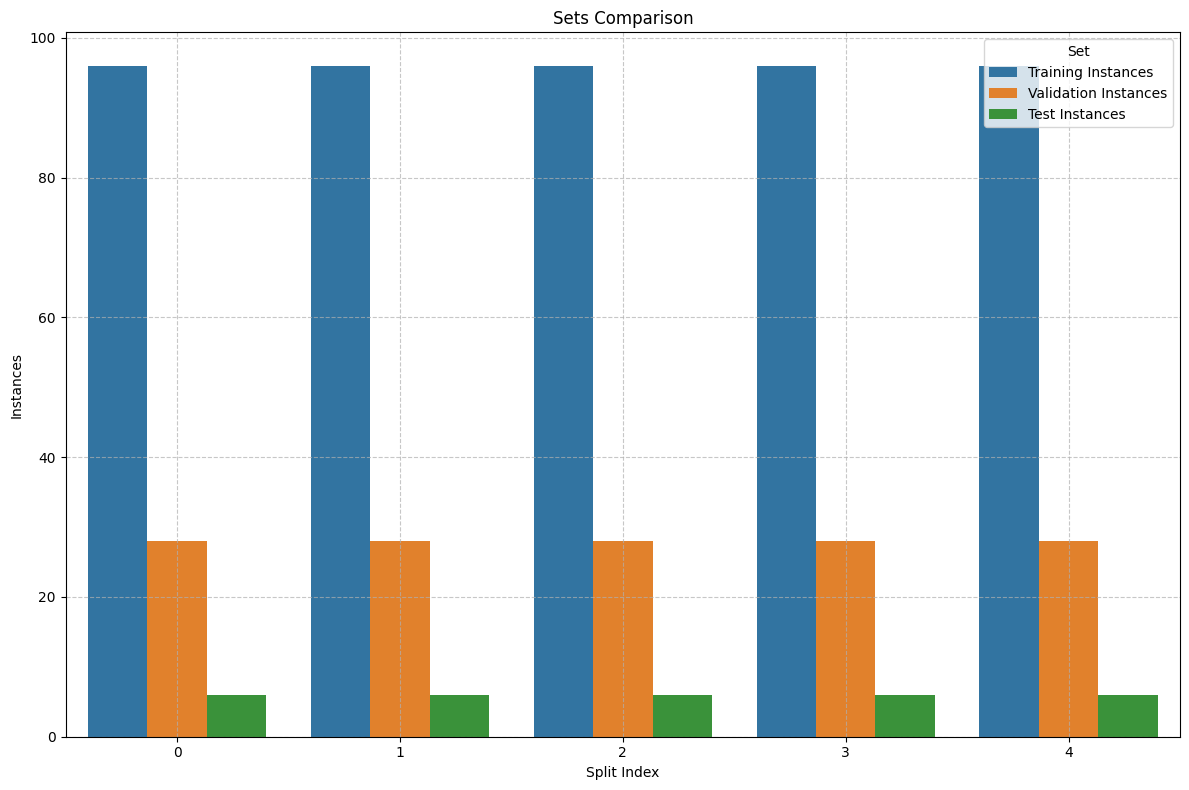

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Extract data for plotting
split_indexes = [split["split_index"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_samples_splits = [len(split["test_samples"]) for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
training_samples_splits = [len(split["train_samples"]) for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
validation_samples_splits = [len(split["val_samples"]) for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

# Prepare the data for Seaborn
data = pd.DataFrame({
    "Split Index": split_indexes,
    "Training Instances": training_samples_splits,
    "Validation Instances": validation_samples_splits,
    "Test Instances": testing_samples_splits,
})

# Melt the data for easier plotting with Seaborn
data_melted = data.melt(id_vars="Split Index", 
                        var_name="Set Type", 
                        value_name="Instances")

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_melted,
    x="Split Index",
    y="Instances",
    hue="Set Type",
    dodge=True,  # Ensure separate bars for each loss type
)

# Add labels and title
plt.xlabel("Split Index")
plt.ylabel("Instances")
plt.title("Sets Comparison")
plt.legend(title="Set", loc="upper right")
plt.grid(linestyle="--", alpha=0.7)

# Save the plot as an SVG file
plot_path_svg = os.path.join(execution_dir, "sets_comparison.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Bar plot of Evaluation Loss Comparison saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()

Bar plot of Evaluation Loss Comparison saved at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_loss_comparison.svg


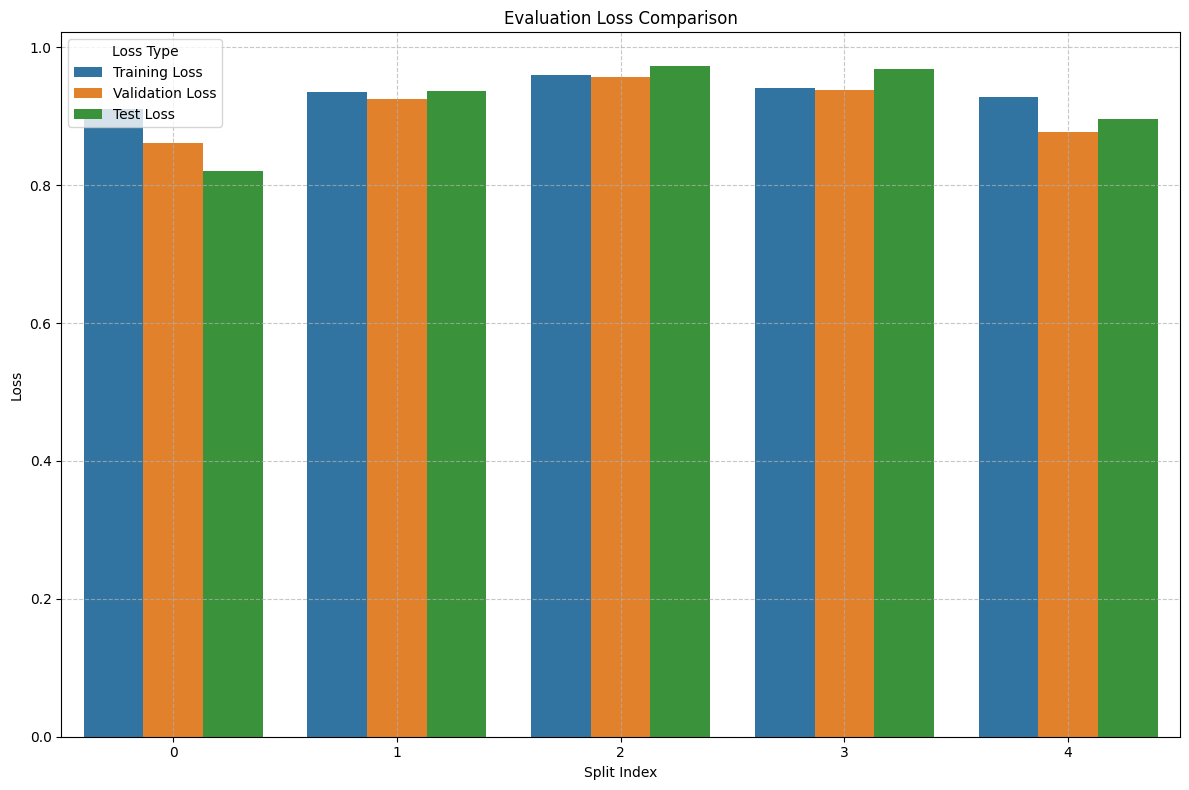

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Extract data for plotting
split_indexes = [split["split_index"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_losses_splits = [split["testing_loss"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
training_losses_splits = [split["training_loss_best_epoch"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
validation_losses_splits = [split["validation_loss_best_epoch"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

# Prepare the data for Seaborn
data = pd.DataFrame({
    "Split Index": split_indexes,
    "Training Loss": training_losses_splits,
    "Validation Loss": validation_losses_splits,
    "Test Loss": testing_losses_splits,
})

# Melt the data for easier plotting with Seaborn
data_melted = data.melt(id_vars="Split Index", 
                        var_name="Loss Type", 
                        value_name="Loss")

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_melted,
    x="Split Index",
    y="Loss",
    hue="Loss Type",
    dodge=True,  # Ensure separate bars for each loss type
)

# Add labels and title
plt.xlabel("Split Index")
plt.ylabel("Loss")
plt.title("Evaluation Loss Comparison")
plt.legend(title="Loss Type", loc="upper left")
plt.grid(linestyle="--", alpha=0.7)

# Save the plot as an SVG file
plot_path_svg = os.path.join(execution_dir, "evaluation_loss_comparison.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Bar plot of Evaluation Loss Comparison saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()

Bar plot of Training and Testing Time Comparison saved at: executions/swin_unetr_v2/tuning-train-test/id=175/evaluation_training_testing_time_comparison.svg


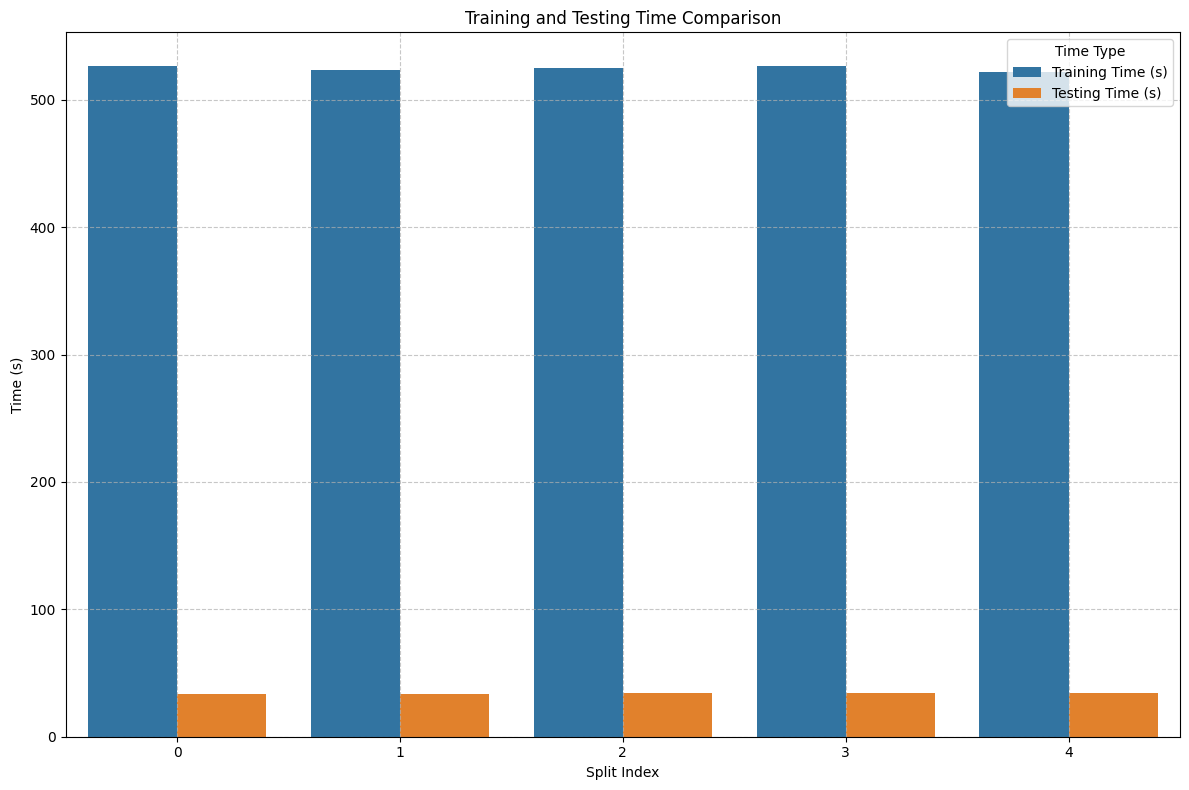

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

training_times_splits = [split["training_time_seconds"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_times_splits = [split["testing_time_seconds"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]

# Prepare the data for Seaborn
data = pd.DataFrame({
    "Split Index": split_indexes,
    "Training Time (s)": training_times_splits,
    "Testing Time (s)": testing_times_splits,
})

# Melt the data for easier plotting with Seaborn
data_melted = data.melt(id_vars="Split Index", 
                        var_name="Time Type", 
                        value_name="Time (s)")

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_melted,
    x="Split Index",
    y="Time (s)",
    hue="Time Type",
    dodge=True,  # Ensure separate bars for each time type
)

# Add labels and title
plt.xlabel("Split Index")
plt.ylabel("Time (s)")
plt.title("Training and Testing Time Comparison")
plt.legend(title="Time Type", loc="upper right")
plt.grid(linestyle="--", alpha=0.7)

# Save the plot as an SVG file
plot_path_svg = os.path.join(execution_dir, "evaluation_training_testing_time_comparison.svg")
plt.savefig(plot_path_svg, format="svg", bbox_inches="tight")
print(f"Bar plot of Training and Testing Time Comparison saved at: {plot_path_svg}")

# Show the plot
plt.tight_layout()
plt.show()


TypeError: unsupported format string passed to list.__format__

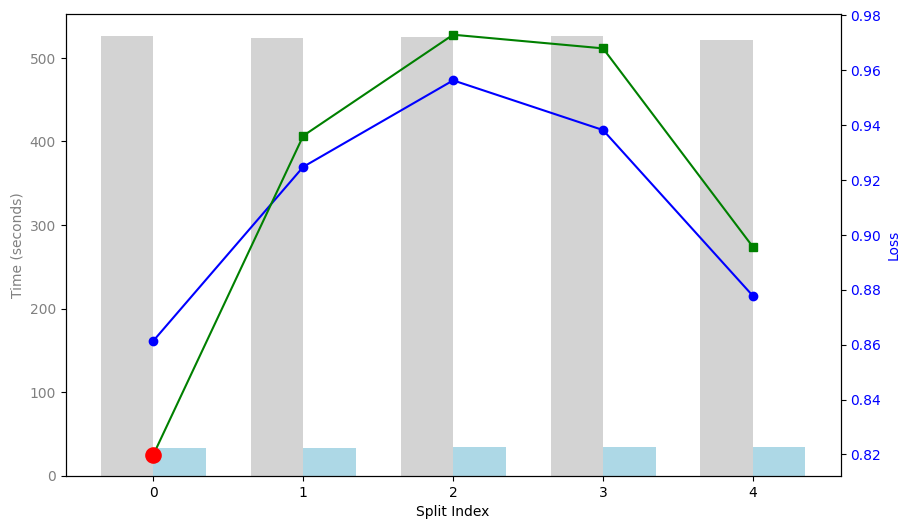

In [18]:
##################################### PLOTTING #####################################

best_split = evaluation_summary["best_split"]["split_index"]
best_split_testing_loss = evaluation_summary["best_split"]["testing_loss"]
validation_losses_splits = [split["validation_loss_best_epoch"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_losses_splits = [split["testing_loss"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_mean_iou_splits = [split["testing_mean_iou"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_dice_splits = [split["testing_dice_coefficient"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_fpr_splits = [split["testing_fpr"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_precision_splits = [split["testing_precision"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]
testing_tpr_recall_splits = [split["testing_tpr_recall"] for split in sorted(evaluation_summary["splits"], key=lambda x: x["split_index"])]


# Number of splits
splits = np.arange(len(training_times_splits))

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Training Times
bar_width = 0.35  # Width of the bars
bar_offset = bar_width / 2
ax1.bar(splits - bar_offset, training_times_splits, color='lightgrey', width=bar_width, label='Training Time (s)')
ax1.bar(splits + bar_offset, testing_times_splits, color='lightblue', width=bar_width, label='Testing Time (s)')
ax1.set_xlabel("Split Index")
ax1.set_ylabel("Time (seconds)", color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Line plot for Validation Losses
ax2 = ax1.twinx()
ax2.plot(splits, validation_losses_splits, marker='o', color='blue', label='Validation Loss', zorder=3)
ax2.plot(splits, testing_losses_splits, marker='s', color='green', label='Testing Loss', zorder=3)
ax2.scatter(best_split, best_split_testing_loss, color='red', s=120, zorder=4, label=f'Best Split (Split {best_split})')
ax2.set_ylabel("Loss", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Compute mean and standard deviation
avg_validation_loss = np.mean(validation_losses_splits)
avg_testing_loss = np.mean(testing_losses_splits)
avg_testing_mean_iou = np.mean(testing_mean_iou_splits)
avg_testing_dice = np.mean(testing_dice_splits)
avg_testing_fpr = np.mean(testing_fpr_splits)
avg_testing_precision = np.mean(testing_precision_splits)
avg_testing_tpr_recall = np.mean(testing_tpr_recall_splits)

plot_title = (
    "Final Evaluation (Split Comparison)\n"
    "Training Times and Validation Losses Across Splits\n"
    f"Complete Execution Time (Including Plotting but no Hypertunning): {elapsed_execution_time // 3600:.0f}h {elapsed_execution_time % 3600 // 60:.0f}m {elapsed_execution_time % 60:.0f}s\n"
    f"Avg. Test Loss: {avg_testing_loss:.4f}\n"
    f"Avg. Test IoU: {avg_testing_mean_iou:.4f} - Avg. Test F1-Score: {avg_testing_dice:.4f}\n"
    f"Avg. Test Precision: {avg_testing_precision:.4f} - Avg. Test TPR/Recall: {testing_tpr_recall_splits:.4f} - Avg. Test FPR: {avg_testing_fpr:.4f}\n"
    f"Averaged Val Loss: {avg_validation_loss:.4f}"
)

# Title and Grid
fig.suptitle(plot_title,)
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.017, 1.00))
ax1.grid(True)

# Save the combined plot
plot_path = os.path.join(execution_dir, f"final_evaluation.png")
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()
    
plt.close(fig)